# **Forecasts for Product Demand**
### *Make Accurate Forecasts for Thousands of Different Products*
<br>

## **Time Series Forecasting Template**

* ### 1. Business understanding and performance metrics definition
* ### 2. Data ingestion
* ### 3. Data exploration and understanding
* ### 4. Data pre-processing and feature engineering
* ### 5. Modeling building and selection
* ### 6. Model deployment
* ### 7. Forecasting solution acceptance
<br>

# 1. Business understanding and performance metrics definition

### **Context**

The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.

### **Content**

Historical Product Demand.csv - CSV data file containing product demand for encoded product id's

### **Acknowledgements**
This dataset is all real-life data and products/warehouse and category information encoded.

### **Problem**
Is it possible to make forecasts for thousands of products (some of them are highly variable in terms of monthly demand) for the the month after next?

**Define the following forecasting aspects:**

    a) The inputs and outputs of your forecasting model
    b) Granularity level of your forecasting model
    c) Horizon of your forecasting model
    d) The endogenous and exogenous features of your forecasting model
    e) The structured or unstructured features of your forecasting model
    f) The univariate or multivariate nature of your forecasting model (The term univariate time series refers to one that consists of single observations recorded sequentially over equal time increments)
    g) Single-step or multi-step structure of your forecasting model
    h) Contiguous or noncontiguous time series values of your forecasting model

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# 2. Data ingestion

In [6]:
df = pd.read_csv('Historical Product Demand.csv')

# 3. Data exploration and understanding

In [7]:
df.head()

Product_Code Warehouse Product_Category       Date Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27         100 
1  Product_0979    Whse_J     Category_028  2012/1/19         500 
2  Product_0979    Whse_J     Category_028   2012/2/3         500 
3  Product_0979    Whse_J     Category_028   2012/2/9         500 
4  Product_0979    Whse_J     Category_028   2012/3/2         500

In [8]:
#Dimension
print("Rows: {} Columns: {}".format(df.shape[0], df.shape[1]))

Rows: 1048575 Columns: 5


In [9]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [10]:
#Change Date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

In [11]:
df['Order_Demand'].unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [12]:
#Change Order Demand format
df['Order_Demand']=df['Order_Demand'].str.replace('(',"")
df['Order_Demand']=df['Order_Demand'].str.replace(')',"")

df['Order_Demand']=df['Order_Demand'].str.strip()
df['Order_Demand']=df['Order_Demand'].str.strip()

#Since the "()" has been removed , we could change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [13]:
df['Order_Demand'].sum()

5145333321

In [14]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [15]:
# Missing Data
#Lets check where these nulls are.
print (df.isna().sum())
print("")
print ('% of Null Dates in the Dataset: ',df.isnull().sum()[3]/df.shape[0]*100)
#There are missing values in Dates.

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

% of Null Dates in the Dataset:  1.0718355863910547


In [16]:
# Drop na's.

# Since the number of missing values are about 1%, I am taking an 'executive decision' of removing them. ;)

df.dropna(axis=0, inplace=True) # Remove all rows with na's.
df.reset_index(drop=True)

Product_Code Warehouse Product_Category       Date  Order_Demand
0        Product_0993    Whse_J     Category_028 2012-07-27           100
1        Product_0979    Whse_J     Category_028 2012-01-19           500
2        Product_0979    Whse_J     Category_028 2012-02-03           500
3        Product_0979    Whse_J     Category_028 2012-02-09           500
4        Product_0979    Whse_J     Category_028 2012-03-02           500
...               ...       ...              ...        ...           ...
1037331  Product_1791    Whse_J     Category_006 2016-04-27          1000
1037332  Product_1974    Whse_J     Category_006 2016-04-27             1
1037333  Product_1787    Whse_J     Category_006 2016-04-28          2500
1037334  Product_0901    Whse_J     Category_023 2016-10-07            50
1037335  Product_0704    Whse_J     Category_001 2016-06-27             4

[1037336 rows x 5 columns]

In [17]:
#Totals

print("Total Product Categories: {} ".format(len(df['Product_Category'].unique())))
print("Total Warehouses: {} ".format(len(df['Warehouse'].unique())))
print("Total Products: {} ".format(len(df['Product_Code'].unique())))

Total Product Categories: 33 
Total Warehouses: 4 
Total Products: 2160 


In [18]:
#Time Series Period

dates = [pd.to_datetime(date) for date in df['Date']]
dates.sort()
print("Start Date: {}".format(dates[0]))
print("Final Date: {}".format(dates[-1]))


Start Date: 2011-01-08 00:00:00
Final Date: 2017-01-09 00:00:00


In [19]:
df.describe(include='all')

Product_Code Warehouse Product_Category                 Date  \
count        1037336   1037336          1037336              1037336   
unique          2160         4               33                 1729   
top     Product_1359    Whse_J     Category_019  2013-09-27 00:00:00   
freq           16936    764447           470266                 2075   
first            NaN       NaN              NaN  2011-01-08 00:00:00   
last             NaN       NaN              NaN  2017-01-09 00:00:00   
mean             NaN       NaN              NaN                  NaN   
std              NaN       NaN              NaN                  NaN   
min              NaN       NaN              NaN                  NaN   
25%              NaN       NaN              NaN                  NaN   
50%              NaN       NaN              NaN                  NaN   
75%              NaN       NaN              NaN                  NaN   
max              NaN       NaN              NaN                  NaN   

        Order_Demand  
count   1.037336e+06  
unique           NaN  
top              NaN  
freq             NaN  
first            NaN  
last             NaN  
mean    4.949384e+03  
std     2.907344e+04  
min     0.000000e+00  
25%     2.000000e+01  
50%     3.000000e+02  
75%     2.000000e+03  
max     4.000000e+06

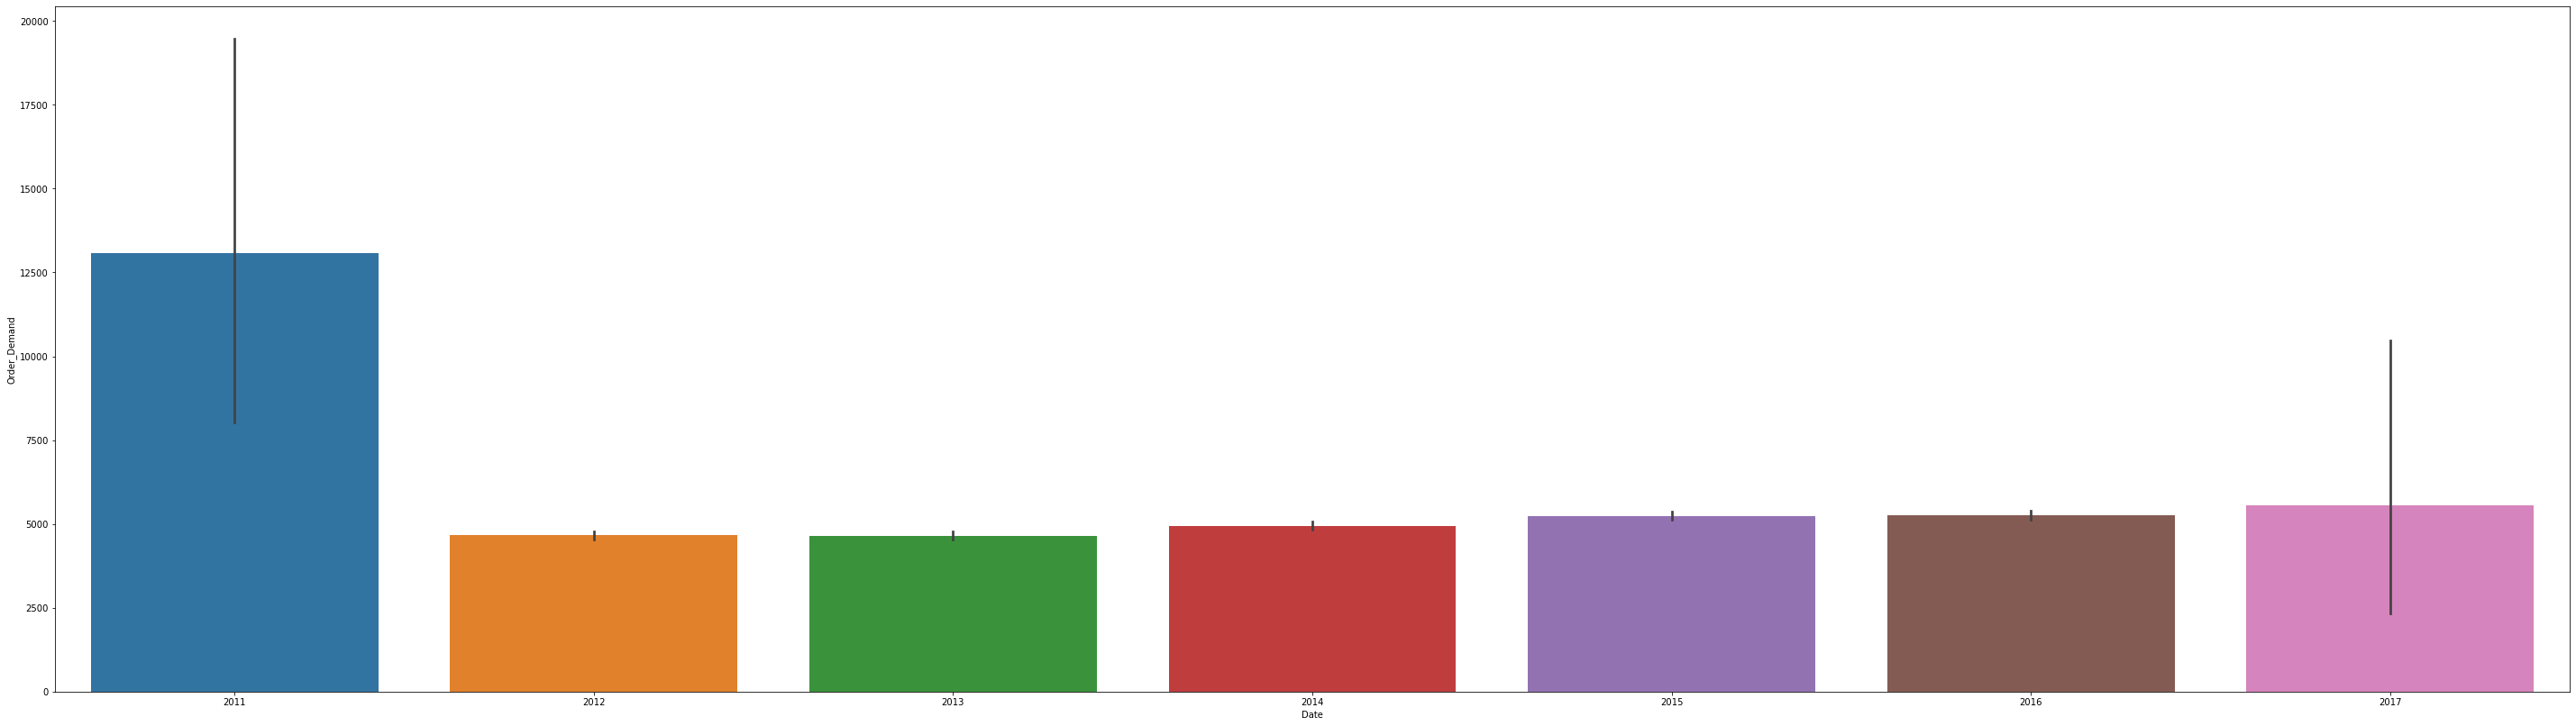

In [20]:
# Histogram / year

rcParams['figure.figsize'] = 50,14
sns.barplot(x=pd.DatetimeIndex(df['Date']).year, y=df['Order_Demand'])

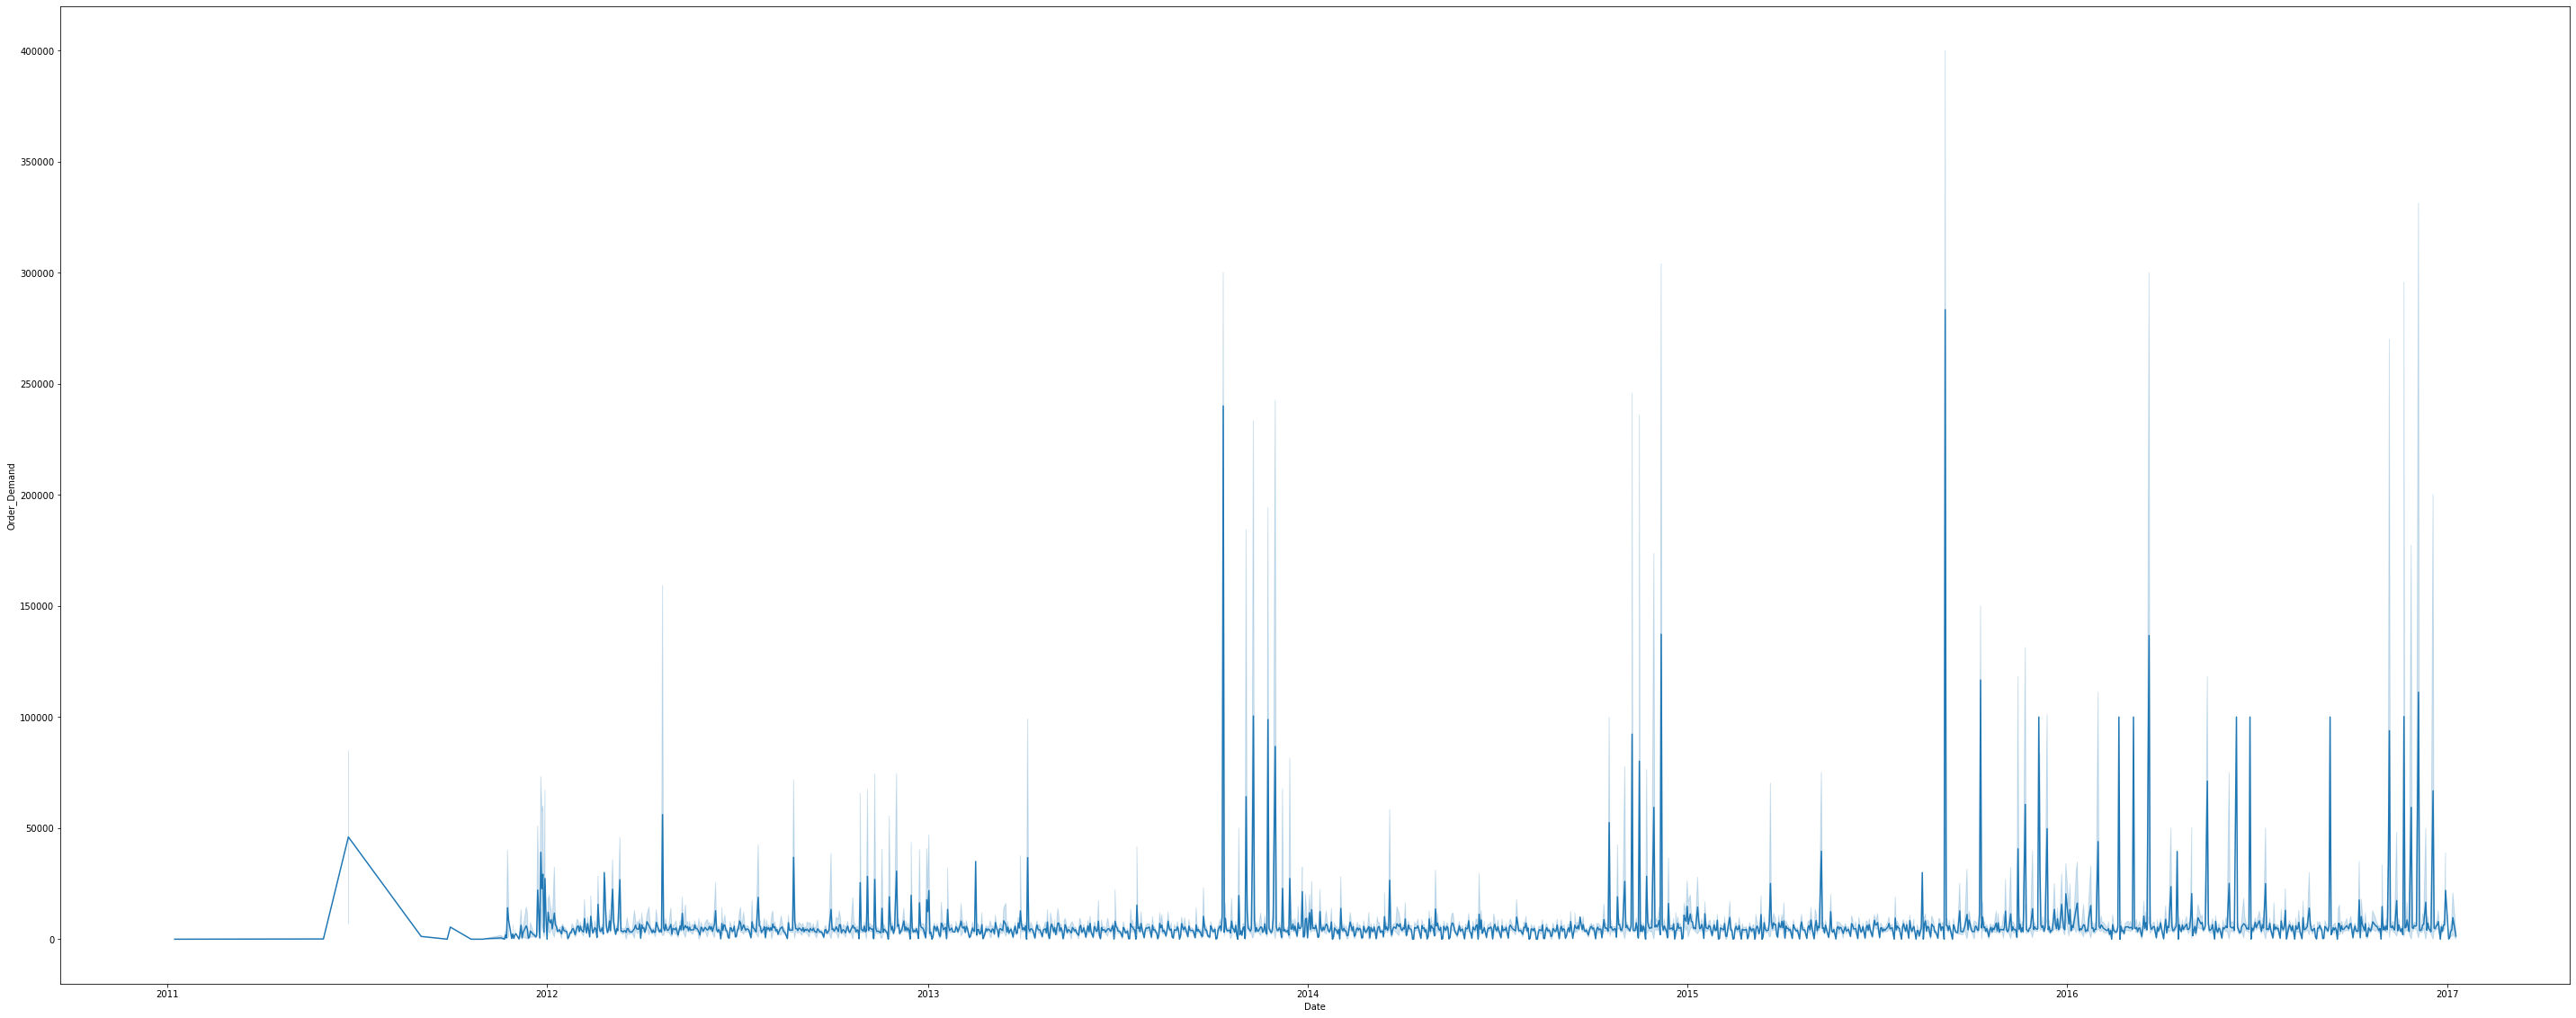

In [21]:
#Line plot / day
rcParams['figure.figsize'] = 50,20
sns.lineplot(x=df['Date'], y=df['Order_Demand'])


In [22]:
#Analizing the 2011 year
df_2011 = df[(df['Date']>='2011-01-01') & (df['Date']<='2012-01-01')].sort_values('Date', ascending=True).copy()

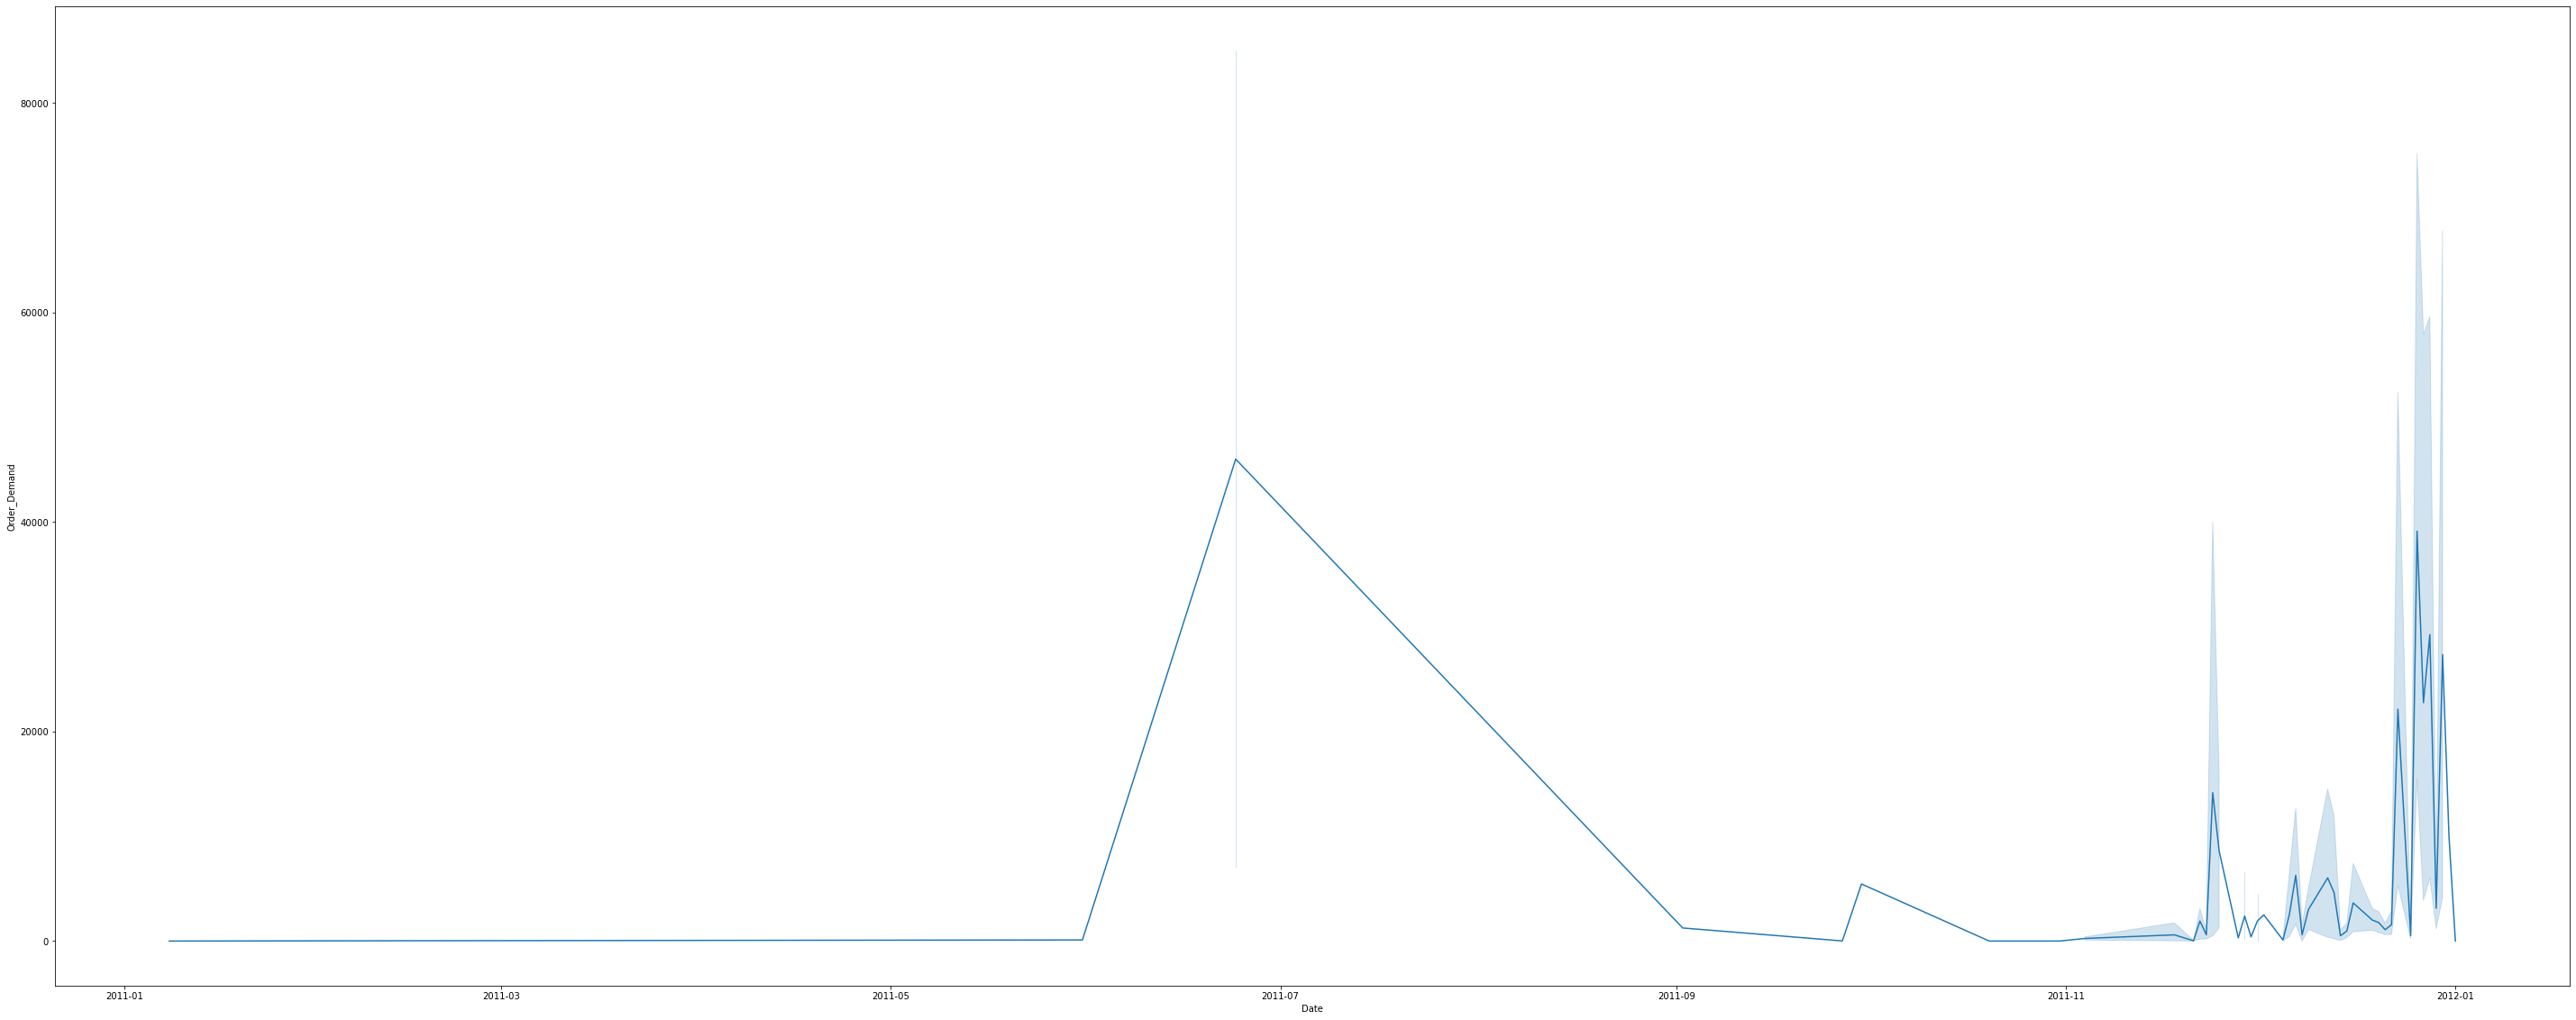

In [23]:
sns.lineplot(x=df_2011['Date'], y=df_2011['Order_Demand'])

In [24]:
#Analizing the 2017 year
df_2017 = df[(df['Date']>='2016-12-31')].sort_values('Date', ascending=True).copy()

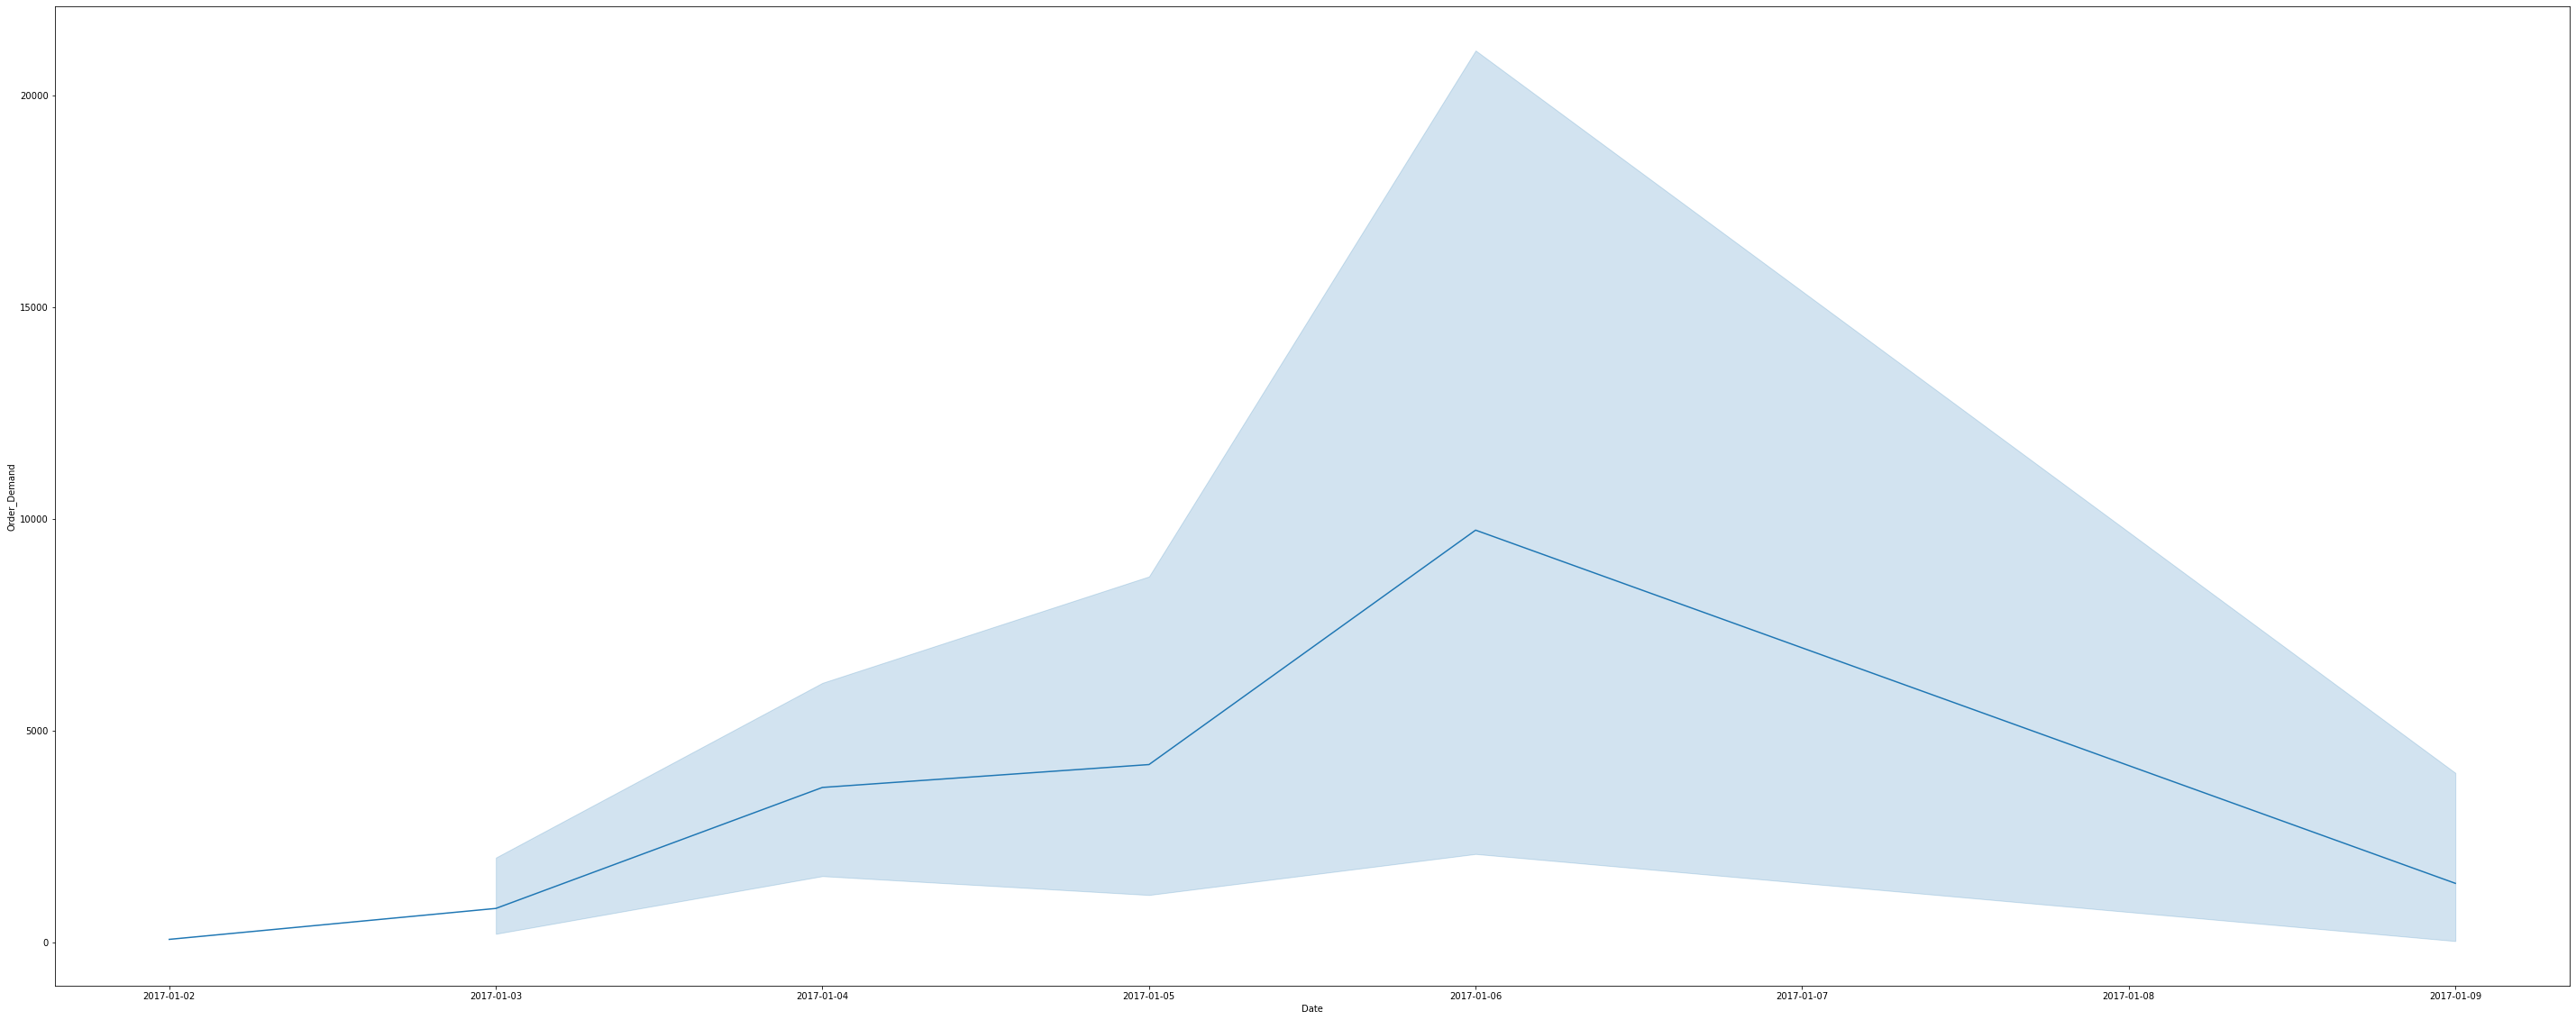

In [25]:
sns.lineplot(x=df_2017['Date'], y=df_2017['Order_Demand'])

In [26]:
#Create Year column
df['Year'] = df['Date'].dt.year

In [27]:
df_year=pd.DataFrame(df.groupby('Year')['Order_Demand'].sum())
df_year['Orders']=df['Year'].value_counts()

In [28]:
df_year

Order_Demand  Orders
Year                      
2011       8363894     640
2012     949259991  203635
2013    1014087922  218298
2014    1071178367  216404
2015    1099398391  209661
2016     991590399  188645
2017        294967      53

In [29]:
#Lets start with 2012 and cap it 2016 december. Since the dates before 2012 have a lot of missing values - inspected and checked using basic time series plot.

df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)


In [95]:
dates1 = [pd.to_datetime(date) for date in df['Date']]
dates1.sort()
print("Start Date: {}".format(dates1[0]))
print("Final Date: {}".format(dates1[-1]))
n_days = dates1[-1] - dates1[0]
print("N Days: {}".format(n_days))

Start Date: 2012-01-01 00:00:00
Final Date: 2016-12-30 00:00:00
N Days: 1825 days 00:00:00


In [30]:
df.head()

Product_Code Warehouse Product_Category       Date  Order_Demand  Year
130870  Product_2166    Whse_S     Category_024 2012-01-01             2  2012
196928  Product_0614    Whse_S     Category_001 2012-01-02             3  2012
200087  Product_1281    Whse_S     Category_019 2012-01-02         14000  2012
200086  Product_1355    Whse_S     Category_019 2012-01-02          5000  2012
77313   Product_2169    Whse_S     Category_024 2012-01-02            55  2012

### Warehouse Analysis

In [31]:
#Warehouse shipping by orders.
df_warehouse  = pd.DataFrame()
df_warehouse['Orders']=df['Warehouse'].value_counts()
df_warehouse['Demand']=df.groupby('Warehouse')['Order_Demand'].sum()
df_warehouse['Demand/Order'] = df_warehouse['Demand'] / df_warehouse['Orders']
df_warehouse['Demand/Order']=df_warehouse['Demand/Order'].round(decimals=2)

In [32]:
df_warehouse.sort_values('Orders', ascending = False)

Orders      Demand  Demand/Order
Whse_J  764215  3362742530       4400.26
Whse_A  142197   147646550       1038.32
Whse_S   88024  1033121811      11736.82
Whse_C   42207   582004179      13789.28

In [33]:
#gráfico

In [34]:
df_warehouse2  = df[['Year', 'Warehouse', 'Order_Demand']].groupby(['Year', 'Warehouse'], as_index=False).count()

In [35]:
df_warehouse2 = df_warehouse2.pivot(index='Year', columns='Warehouse', values='Order_Demand')

In [36]:
df_warehouse2['Total'] = df_warehouse2.sum(axis=1)

In [37]:
df_warehouse2

Warehouse  Whse_A  Whse_C  Whse_J  Whse_S   Total
Year                                             
2012        28218    6889  150013   18515  203635
2013        33607    7934  156251   20506  218298
2014        28124    8187  157786   22307  216404
2015        26686    8963  153937   20075  209661
2016        25562   10234  146228    6621  188645

In [38]:
#gráfico

### Warehouse Time Series Analysis 

In [46]:
df_warehouse3 = df[['Warehouse', 'Date', 'Order_Demand']].groupby(['Date', 'Warehouse'], as_index=False).sum()

In [47]:
df_warehouse3.head()

Date Warehouse  Order_Demand
0 2012-01-01    Whse_S             2
1 2012-01-02    Whse_A           500
2 2012-01-02    Whse_S        679777
3 2012-01-03    Whse_A        152892
4 2012-01-03    Whse_C        275137

In [74]:
df_Whse_S = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_S']
df_Whse_A = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_A']
df_Whse_C = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_C']
df_Whse_J = df_warehouse3[df_warehouse3['Warehouse'] == 'Whse_J']

In [85]:
# plot line with x-axis, y-axis and title
def plotline(x):
    plt.plot(x.Date, x.Order_Demand)
    #plt.title(x.Warehouse[0])
    plt.xlabel("days")
    plt.ylabel("Order Demand")
    plt.show()

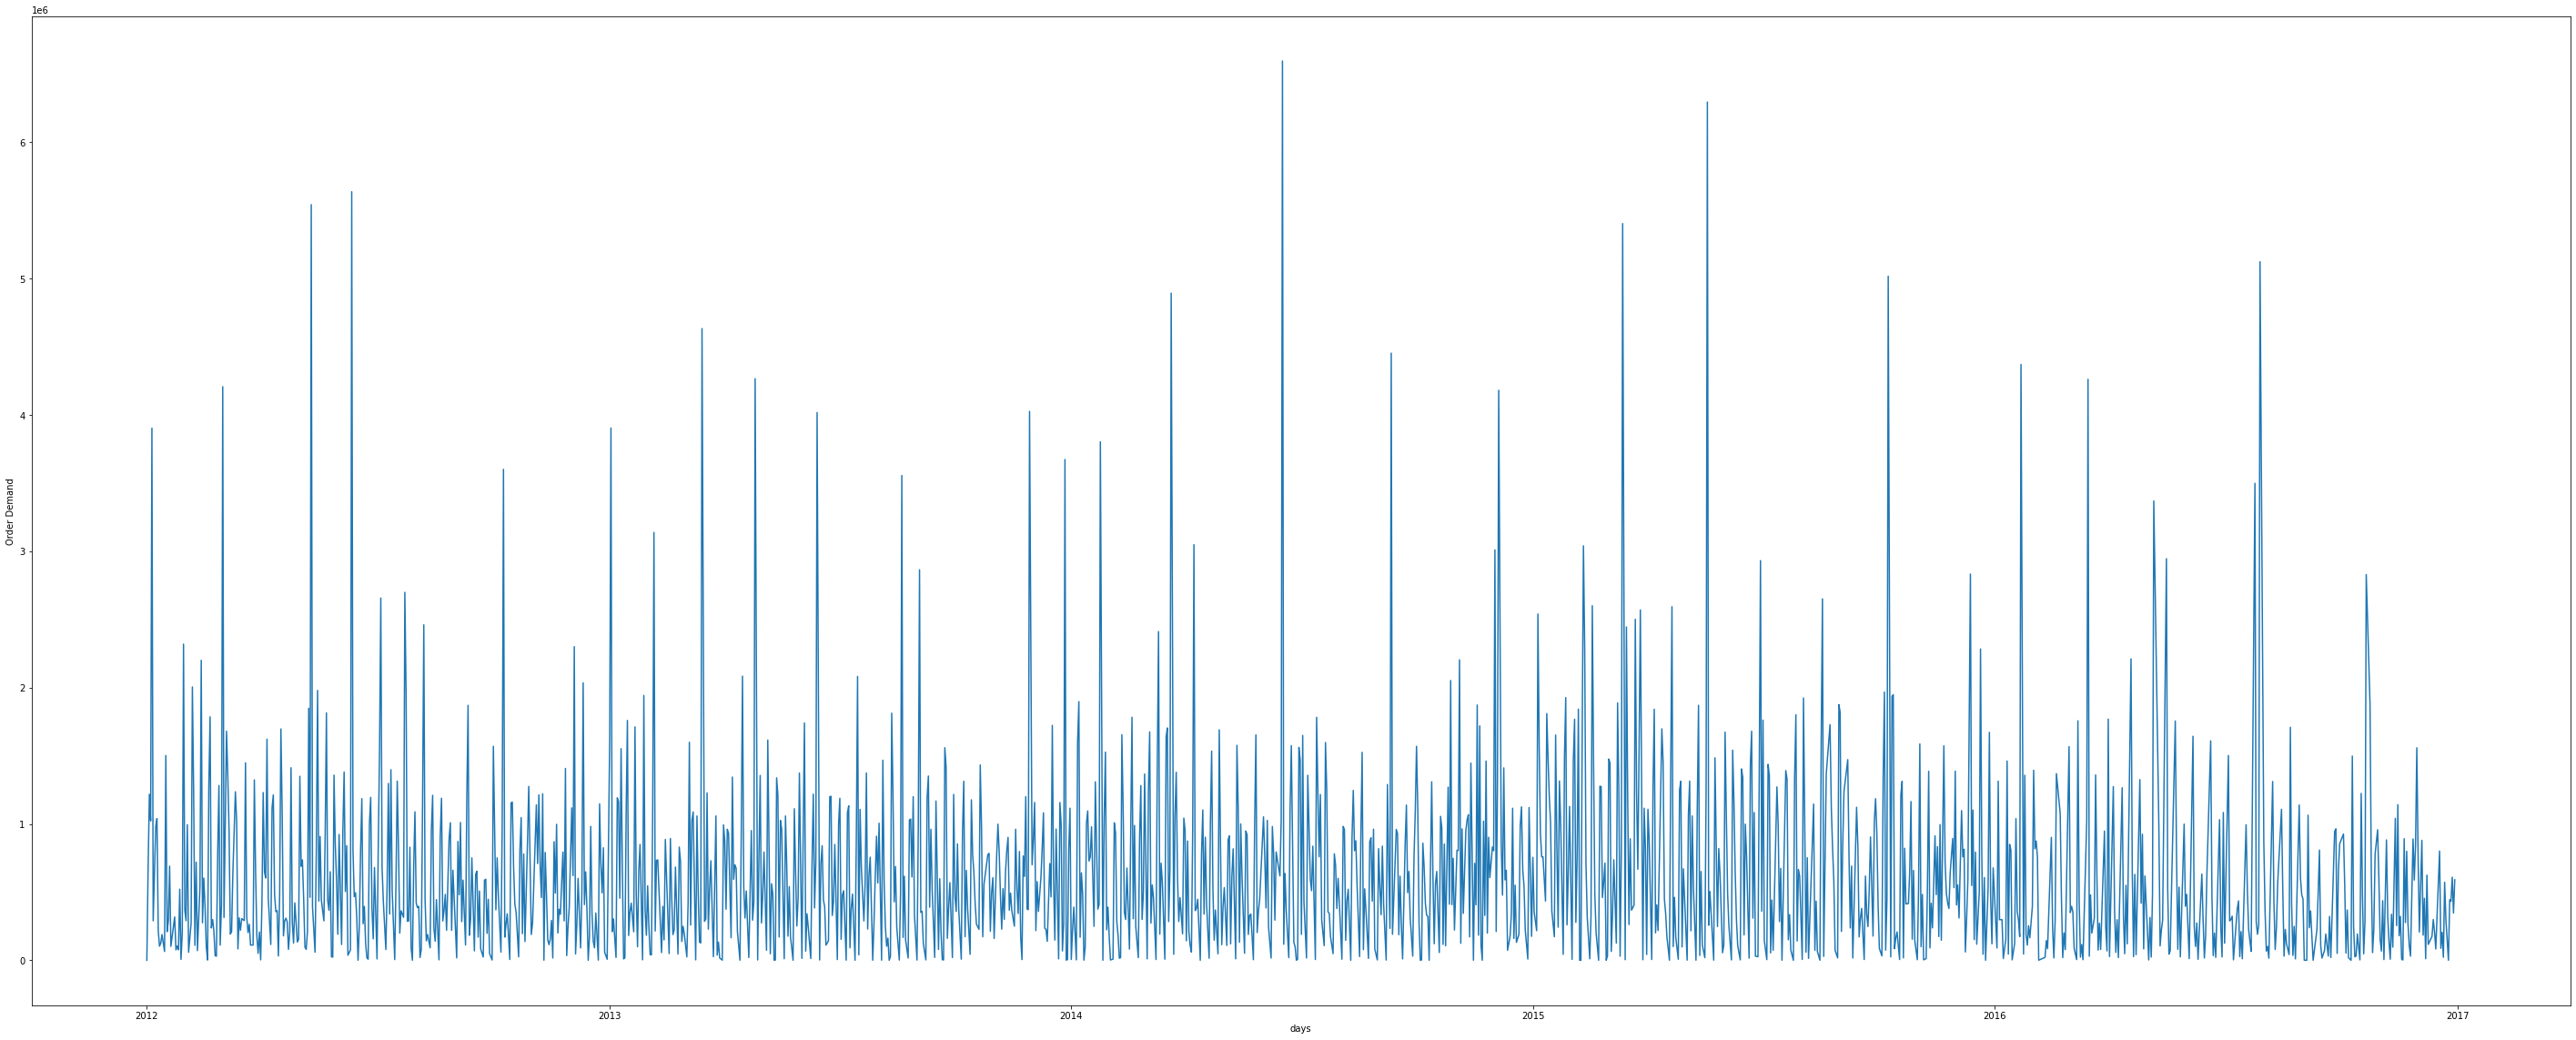

In [86]:
plotline(df_Whse_S)

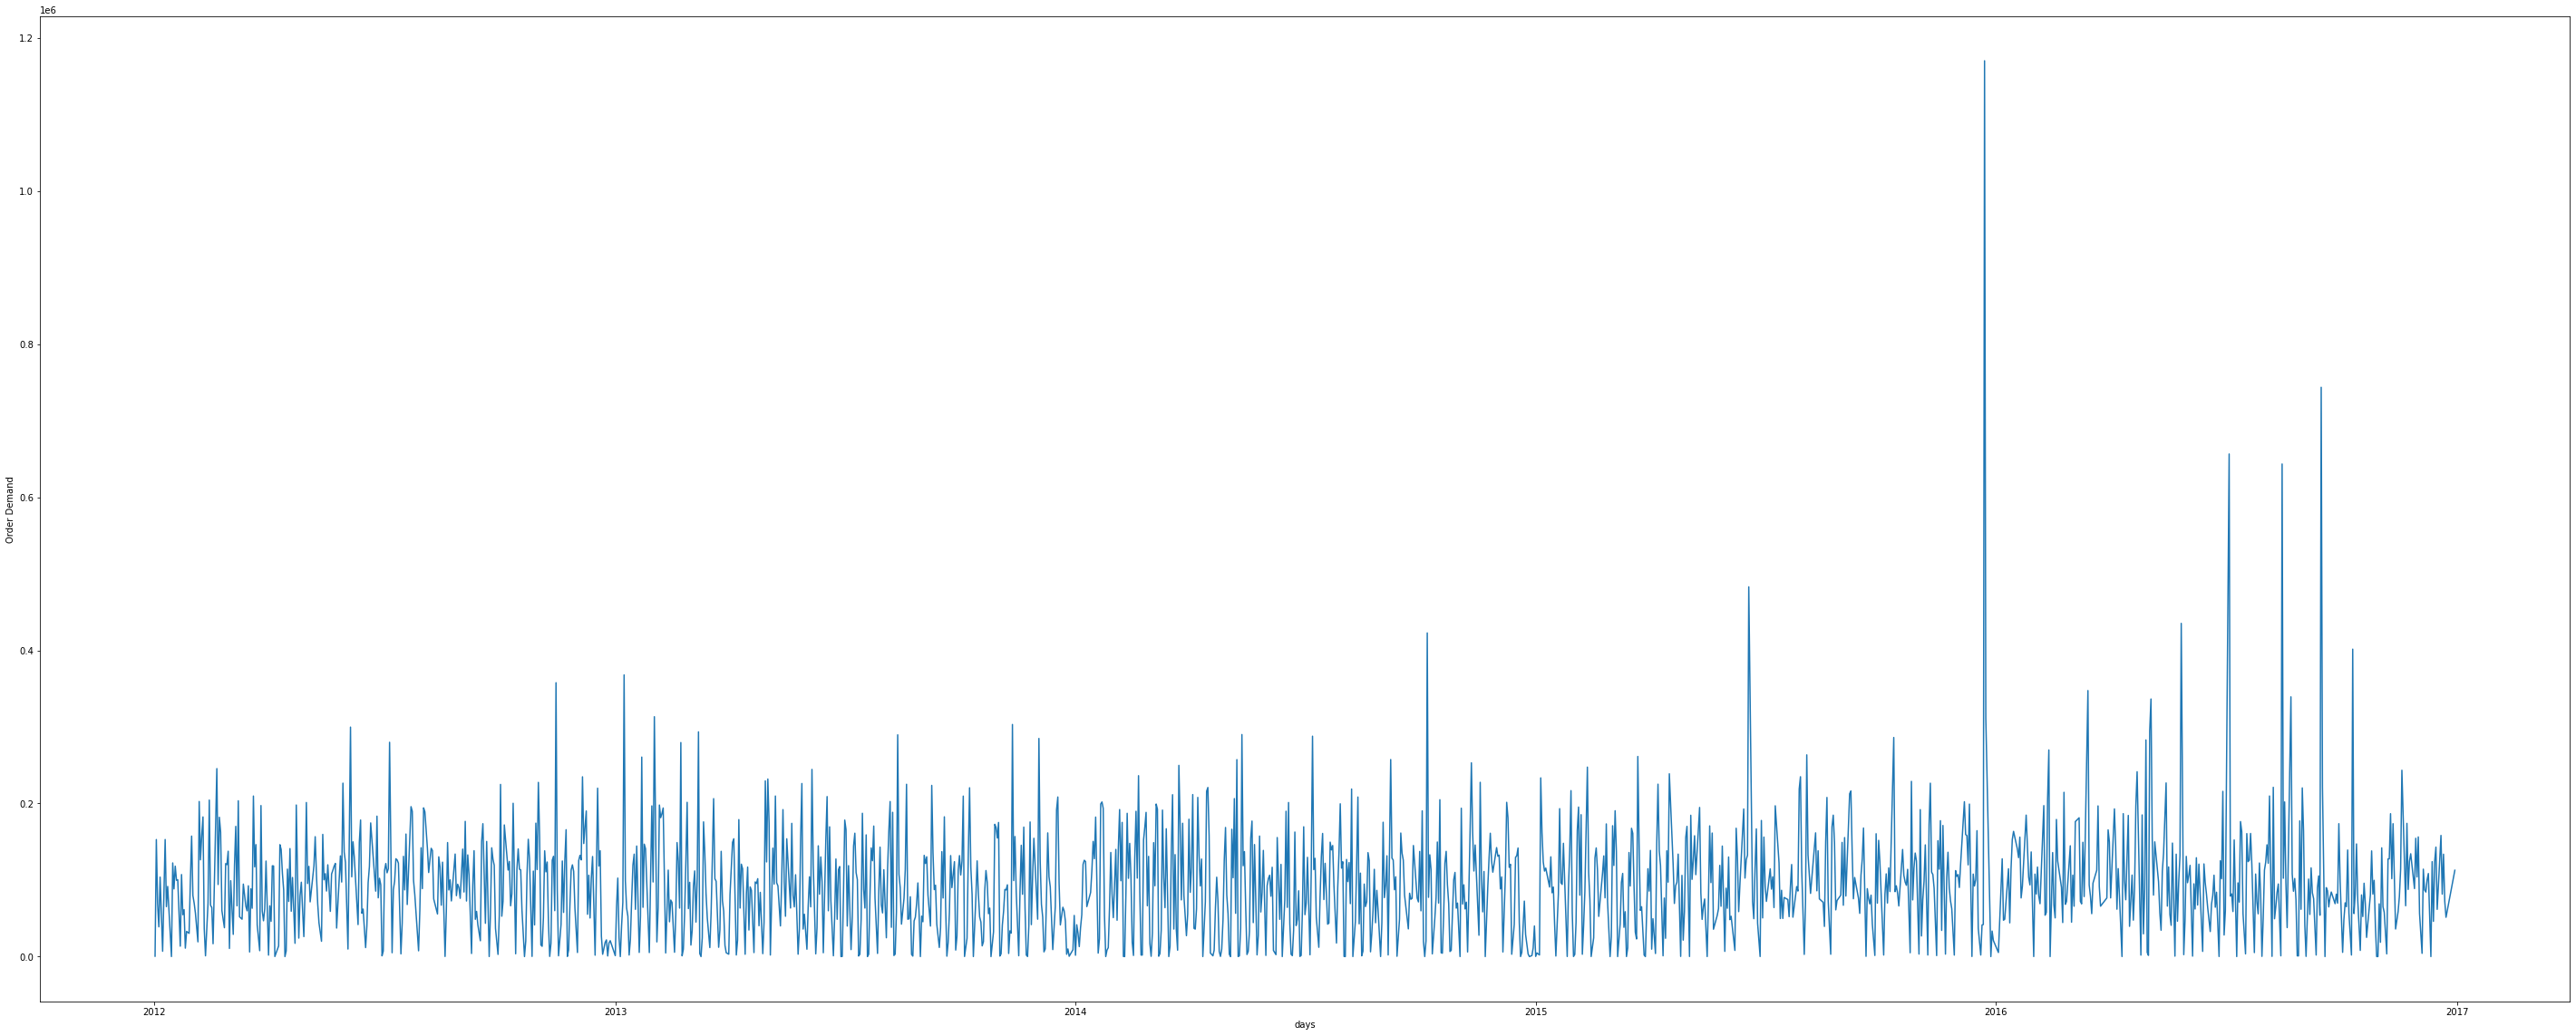

In [87]:
plotline(df_Whse_A)

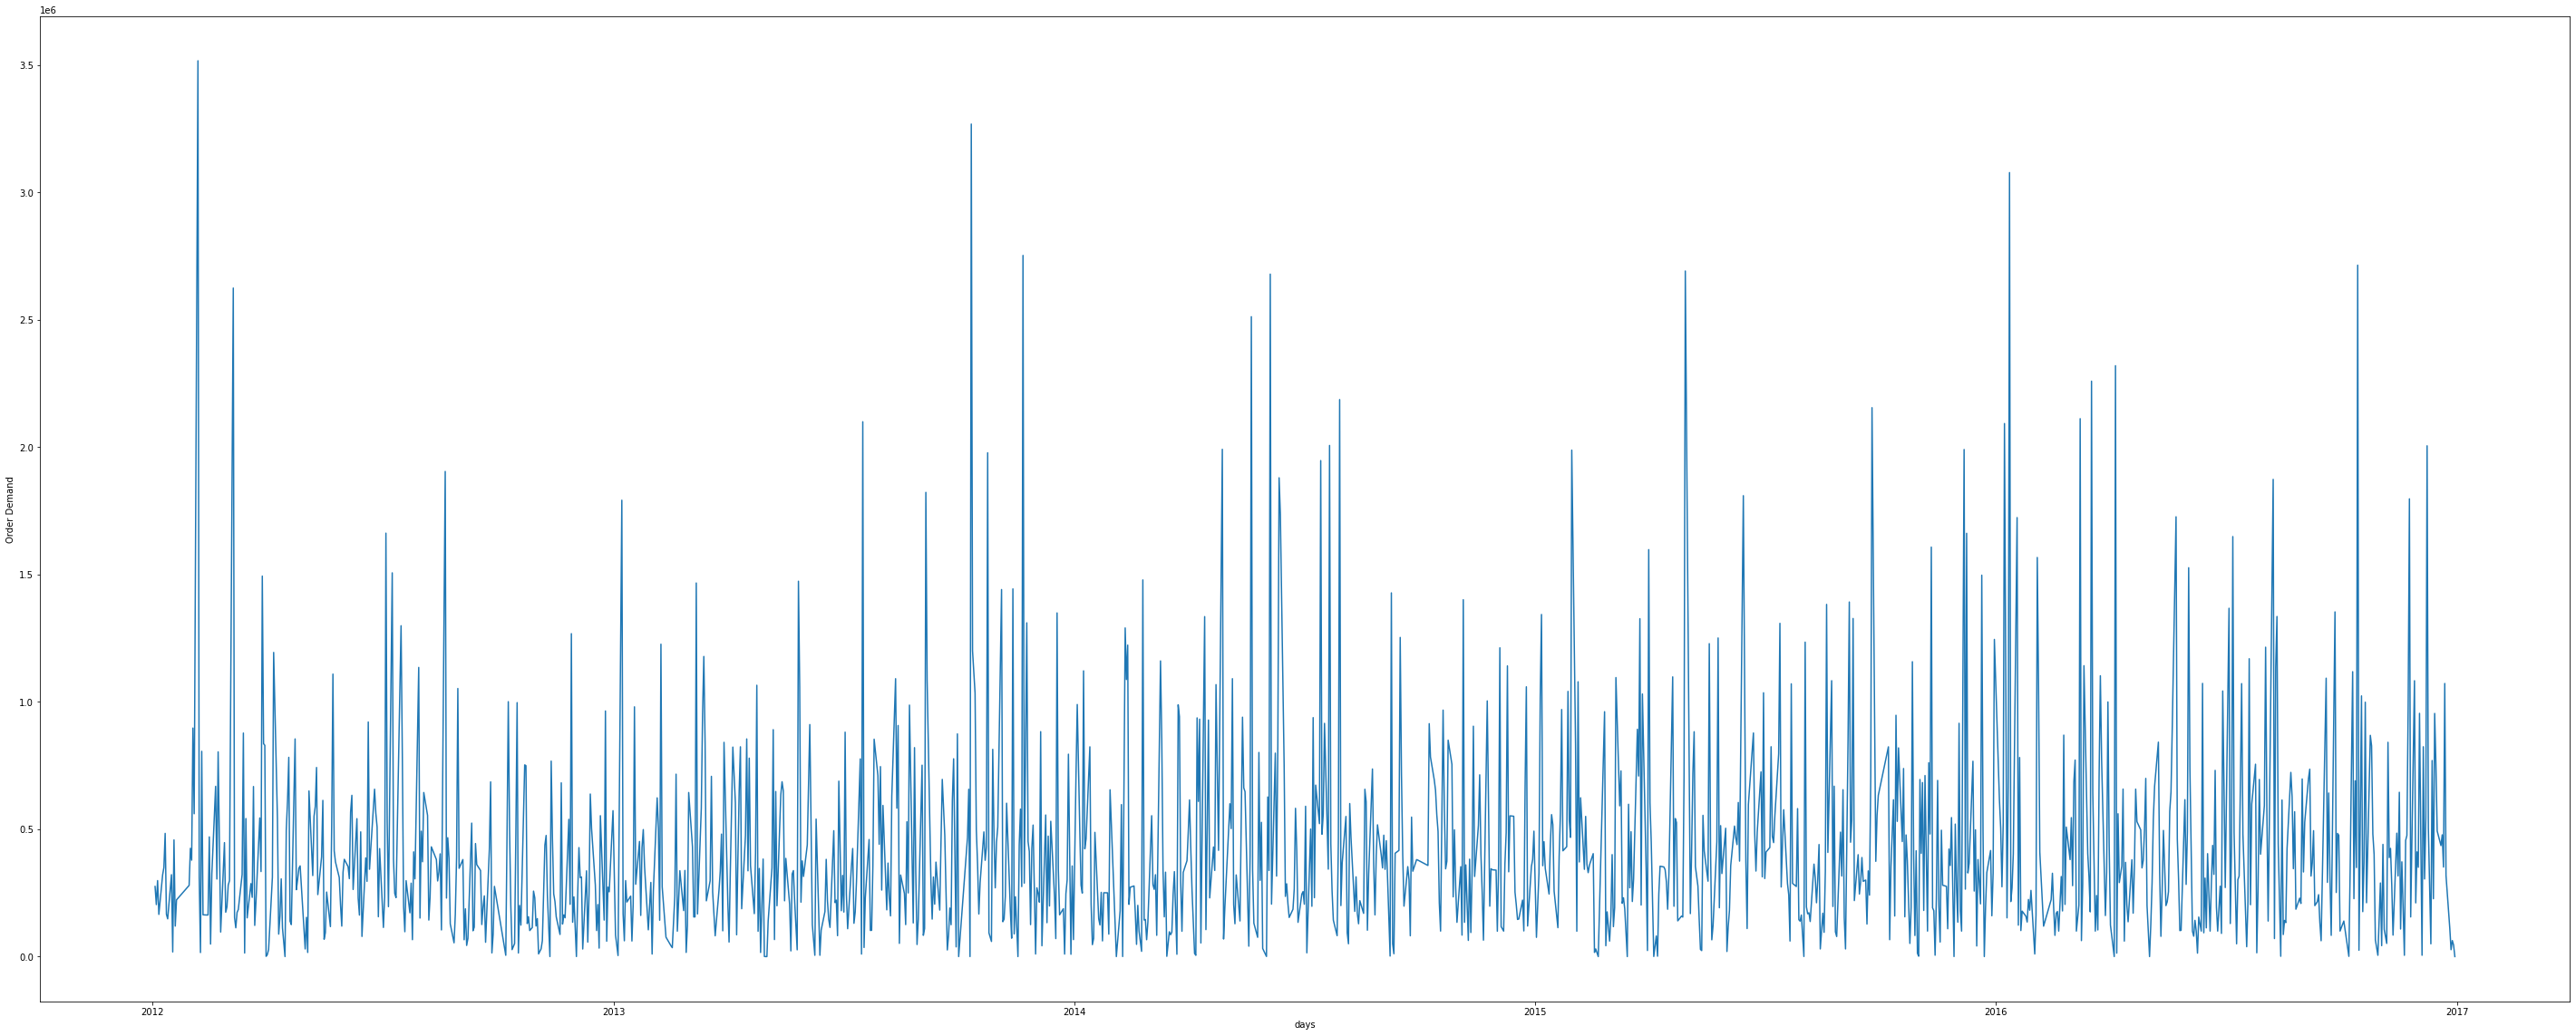

In [88]:
plotline(df_Whse_C)

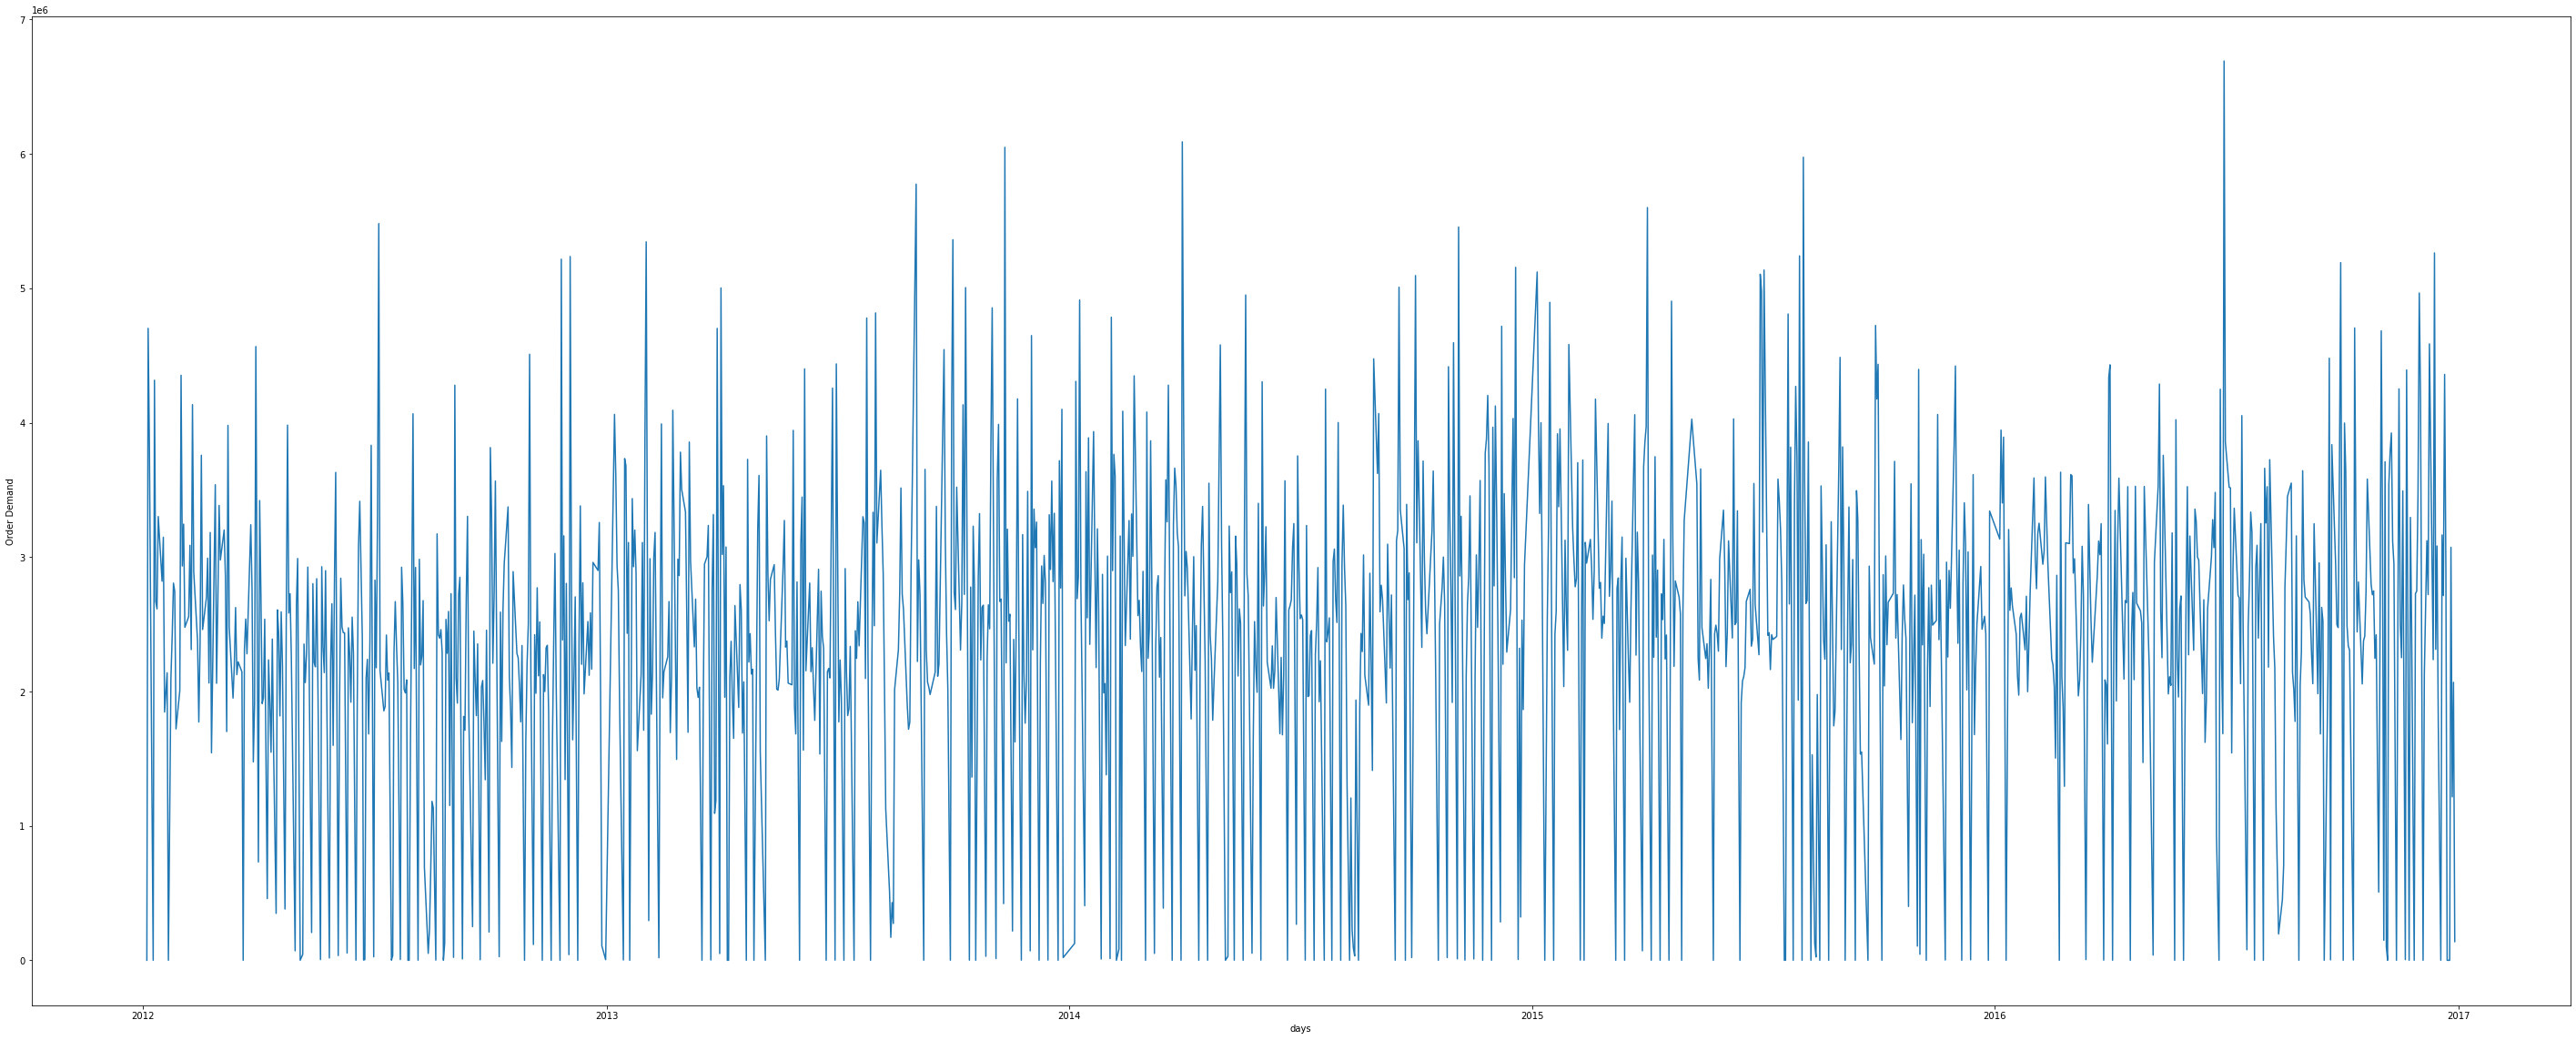

In [89]:
plotline(df_Whse_J)

In [53]:
df_warehouse4 = pd.pivot_table(df_warehouse3, index='Date', columns='Warehouse', values='Order_Demand', fill_value=0)

In [55]:
df_warehouse4.head()

Warehouse   Whse_A  Whse_C   Whse_J   Whse_S
Date                                        
2012-01-01       0       0        0        2
2012-01-02     500       0        0   679777
2012-01-03  152892  275137        0  1217228
2012-01-04   69163  204000      120  1022578
2012-01-05   38834  298318  4701940  3902682

In [54]:
df_warehouse4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1681 entries, 2012-01-01 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Whse_A  1681 non-null   int64
 1   Whse_C  1681 non-null   int64
 2   Whse_J  1681 non-null   int64
 3   Whse_S  1681 non-null   int64
dtypes: int64(4)
memory usage: 65.7 KB


In [93]:
df_warehouse4.count(axis=0)

Warehouse
Whse_A    1681
Whse_C    1681
Whse_J    1681
Whse_S    1681
dtype: int64

In [98]:
df_warehouse4.isnull().sum()

Warehouse
Whse_A    0
Whse_C    0
Whse_J    0
Whse_S    0
dtype: int64

In [99]:
df_warehouse4.astype(bool).sum(axis=0)

Warehouse
Whse_A    1543
Whse_C    1316
Whse_J    1355
Whse_S    1552
dtype: int64

In [111]:
# Zero Demands
x = (1- (df_warehouse4.astype(bool).sum(axis=0) / df_warehouse4.count(axis=0)))*100
x

Warehouse
Whse_A     8.209399
Whse_C    21.713266
Whse_J    19.393218
Whse_S     7.674004
dtype: float64

In [106]:
df_warehouse4.head()

Warehouse   Whse_A  Whse_C   Whse_J   Whse_S
Date                                        
2012-01-01       0       0        0        2
2012-01-02     500       0        0   679777
2012-01-03  152892  275137        0  1217228
2012-01-04   69163  204000      120  1022578
2012-01-05   38834  298318  4701940  3902682

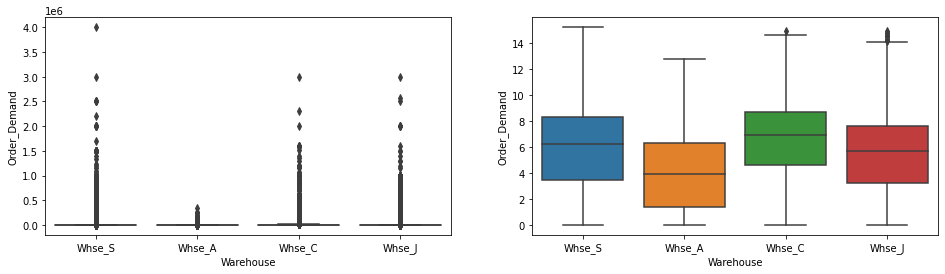

In [101]:
#Lets check the orders by warehouse.

#Checking with Boxplots
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1, 2)
#Regular Data
fig3 = sns.boxplot( df['Warehouse'],df['Order_Demand'], ax = axes[0])
#Data with Log Transformation
fig4 = sns.boxplot( df['Warehouse'], np.log1p(df['Order_Demand']),ax = axes[1])

del fig3, fig4

## Time Series Analysis

In [112]:
# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

In [113]:
#This gives us the total orders placed on each day.

df = df.groupby('Date')['Order_Demand'].sum().reset_index()
#Index the date
df = df.set_index('Date')
df.index #Lets check the index


DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11',
               ...
               '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1681, freq=None)

## Time Series Decomposition

### Daily

In [146]:
y_d = df['Order_Demand'].resample('B').mean()

In [147]:
y_d.isna().sum()

0

In [148]:
#In case there are Null values, they can be imputed using bfill.
#y_d = y_d.fillna(y_d.bfill())

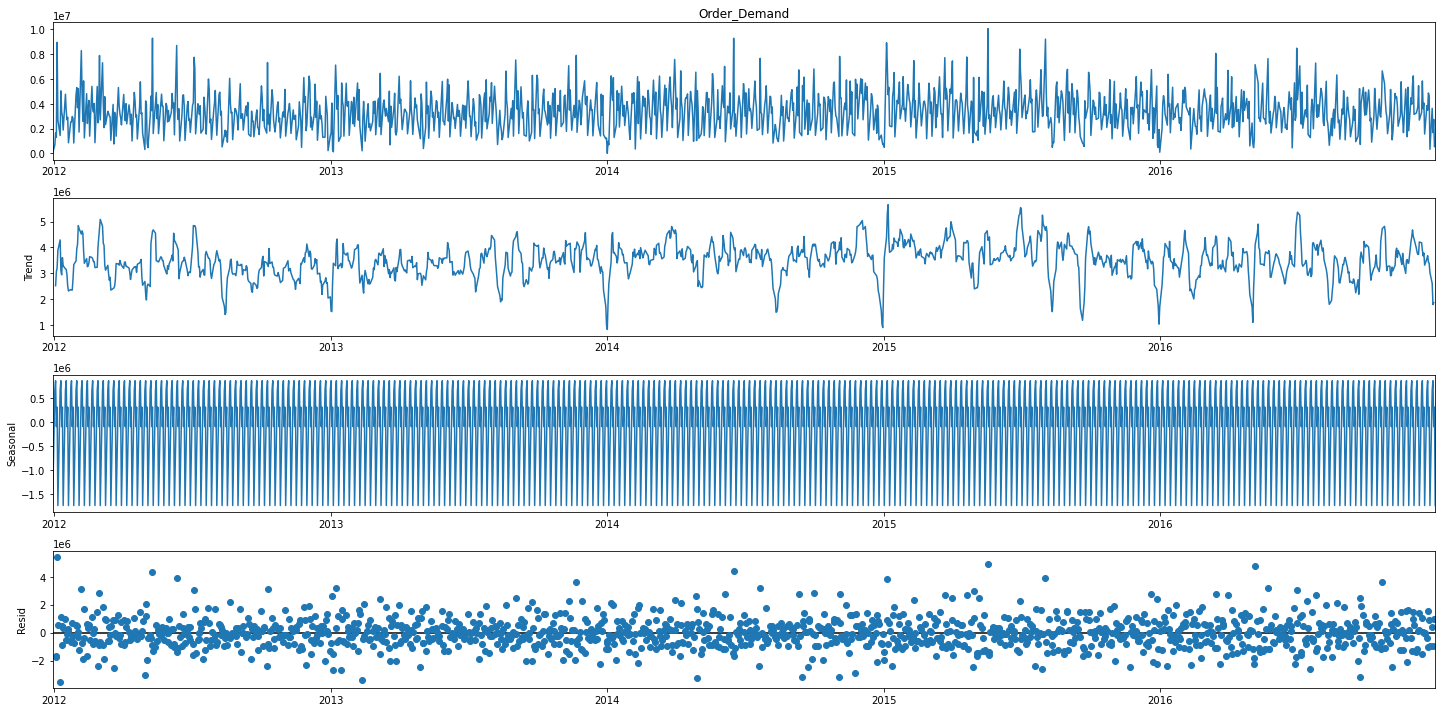

In [149]:
#Business Day Decomposition

decomposition = sm.tsa.seasonal_decompose(y_d, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [20.0, 20.0]

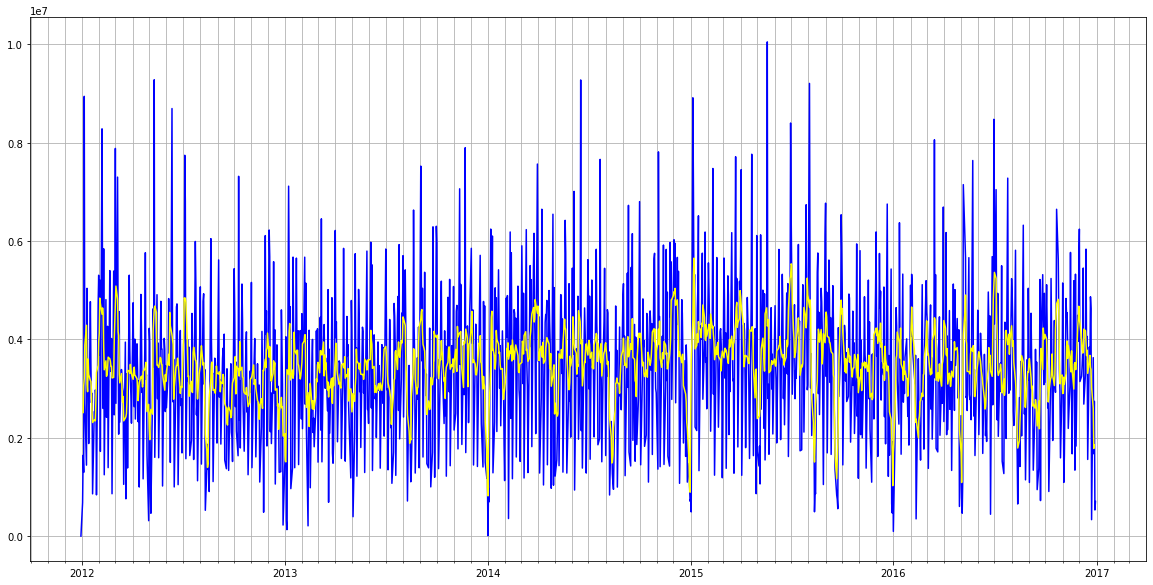

In [162]:
# Data + Trend (Daily)

matplotlib.rcParams['figure.figsize'] = [20, 10.0]
decomposition = sm.tsa.seasonal_decompose(y_d, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(y_d.index, y_d, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='yellow')

### Weekly

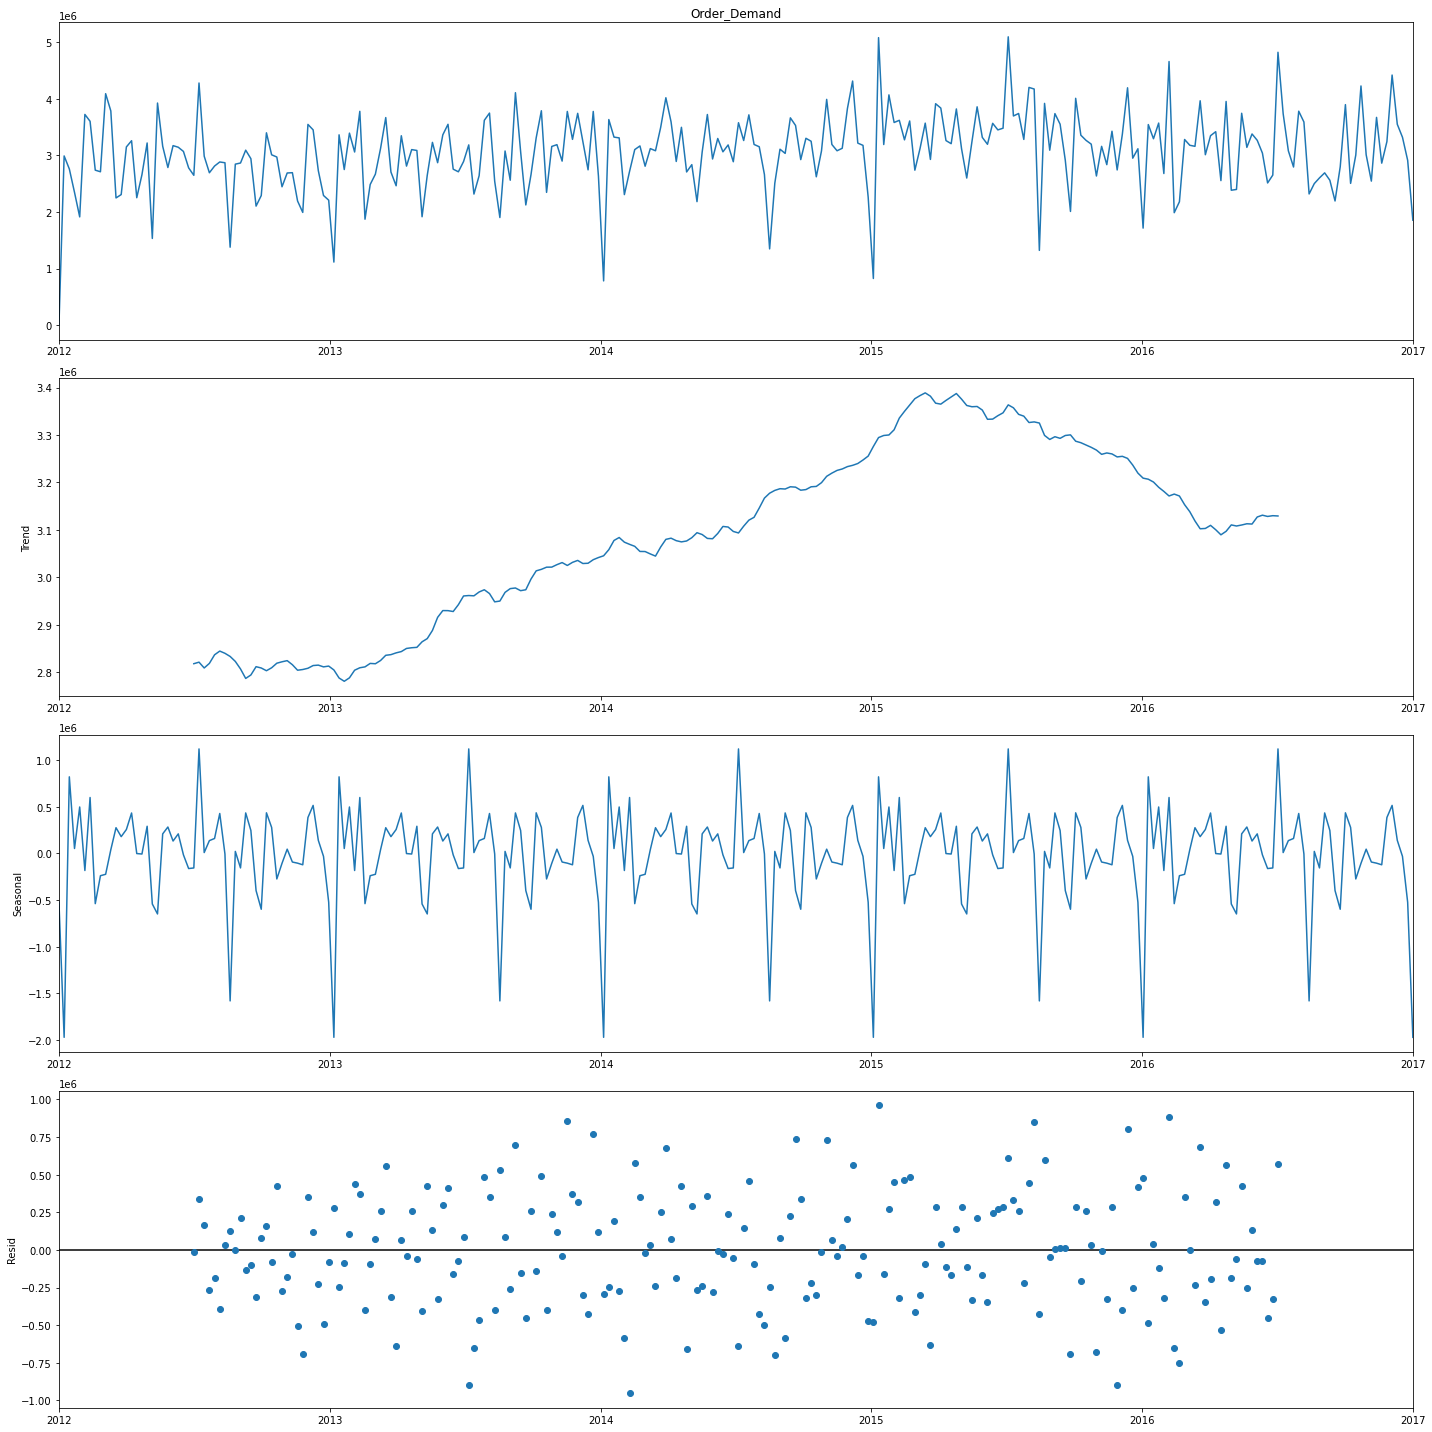

In [157]:
#Week Decomposition
y_w = df['Order_Demand'].resample('W').mean()

decomposition = sm.tsa.seasonal_decompose(y_w, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [20.0, 20.0]

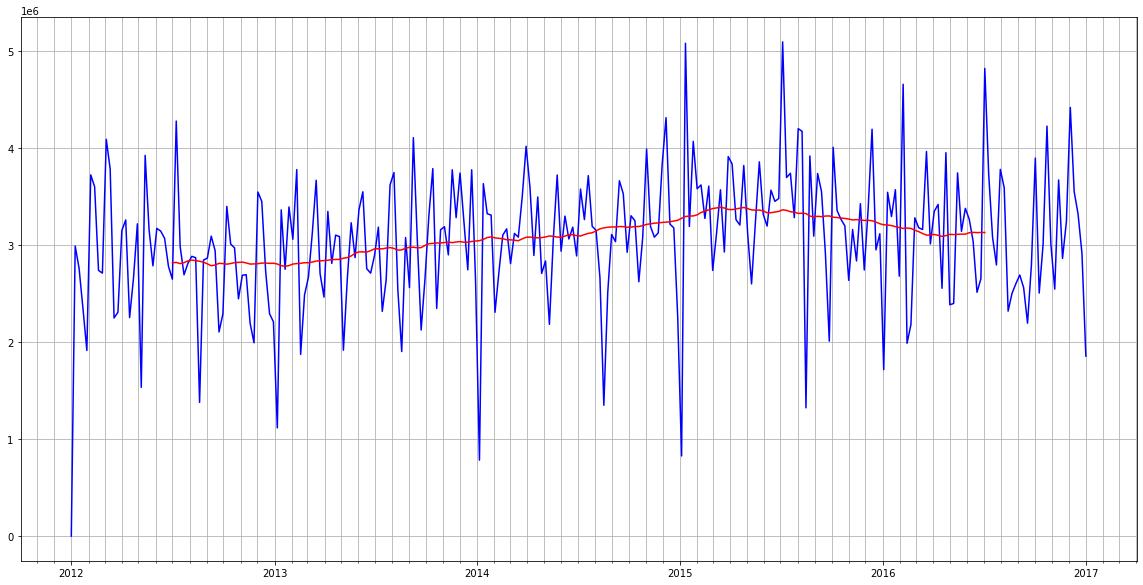

In [163]:
# Data + Trend (weekly)

matplotlib.rcParams['figure.figsize'] = [20, 10.0]
decomposition = sm.tsa.seasonal_decompose(y_w, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(y_w.index, y_w, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

### Monthly

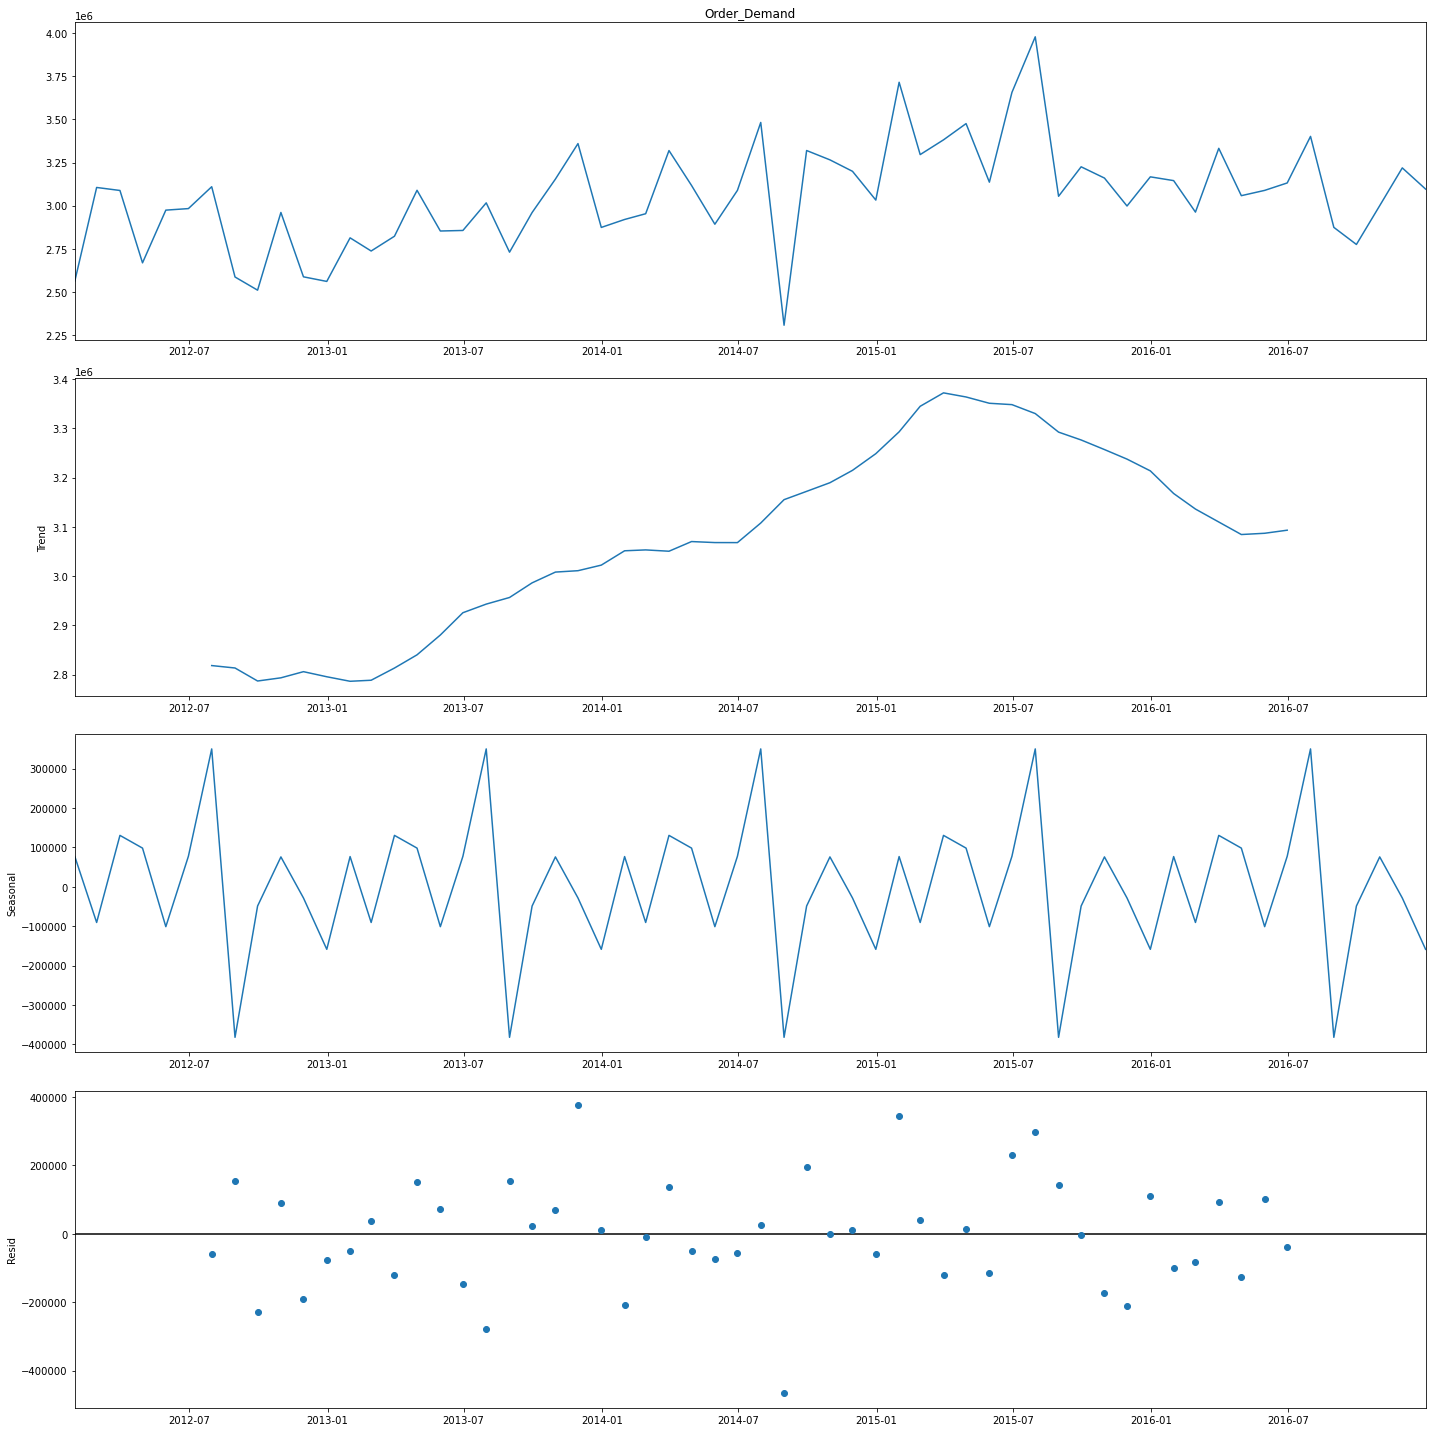

In [155]:
#Month Deconposition

y_m = df['Order_Demand'].resample('M').mean()

decomposition = sm.tsa.seasonal_decompose(y_m, model = 'additive')
fig = decomposition.plot()
matplotlib.rcParams['figure.figsize'] = [20.0, 20.0]

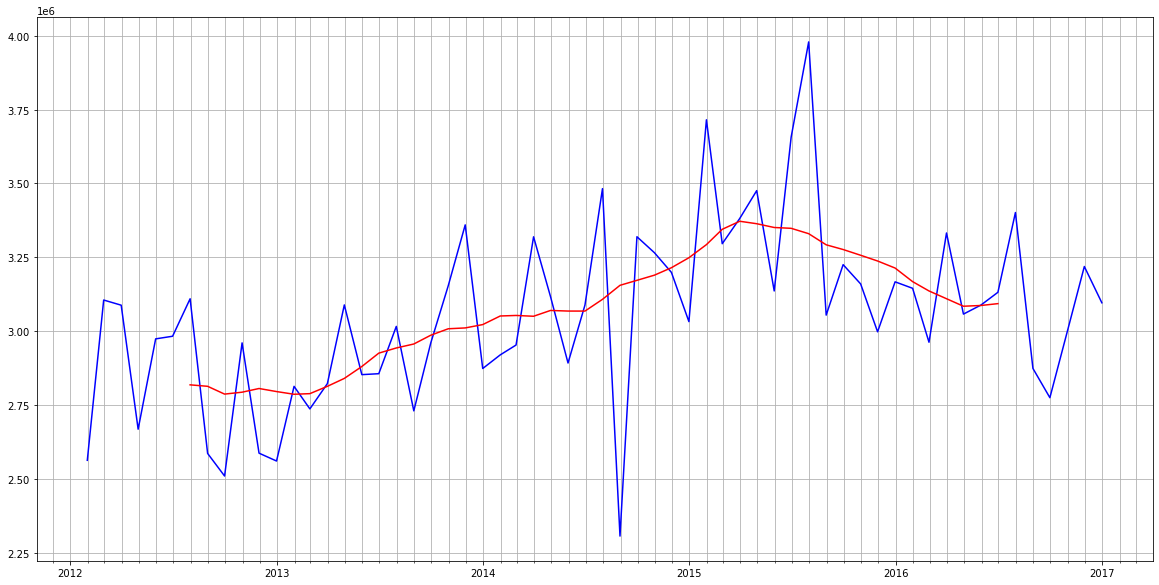

In [164]:
# Data + Trend (monthly)

matplotlib.rcParams['figure.figsize'] = [20, 10.0]
decomposition = sm.tsa.seasonal_decompose(y_m, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(y_m.index, y_m, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

### Check Stationarity

The Time series data model works on stationary data. The stationarity of data is described by the following three criteria:-

1) It should have a constant mean

2) It should have a constant variance

3) Auto covariance does not depend on the time

*Mean – it is the average value of all the data

*Variance – it is a difference of each point value from the mean

*Auto covariance –it is a relationship between any two values at a certain amount of time.

#### Method to check the stationarity of the Time Series Data:-
There are two methods in python to check data stationarity:-

1) Rolling statistics:-

This method gave a visual representation of the data to define its stationarity. 
A Moving variance or moving average graph is plot and then it is observed whether it varies with time or not. 
In this method, a moving window of time is taken (based on our needs, for eg-10, 12, etc.) 
and then the mean of that time period is calculated as the current value.

2) Augmented Dickey- fuller Test (ADCF): –

In this method, we take a null hypothesis that the data is non-stationary. 
After executing this test, it will give some results comprised of test statistics 
and some other critical values that help to define the stationarity. 
If the test statistic is less than the critical value then we can reject the null hypothesis 
and say that the series is stationary.

In [192]:
#Test 

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

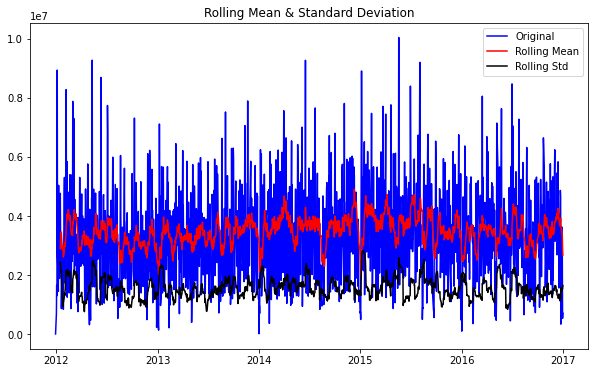

Results of Dickey-Fuller Test:
Test Statistic                -6.732774e+00
p-value                        3.264119e-09
#Lags Used                     1.900000e+01
Number of Observations Used    1.286000e+03
Critical Value (1%)           -3.435445e+00
Critical Value (5%)           -2.863790e+00
Critical Value (10%)          -2.567968e+00
dtype: float64


In [193]:
#Test Y Daily
test_stationarity(y_d)

We can compare the ADF test statistic of -6.73 against the critical values. 
We see that the test statistic is more than all of the critical values, 
so we can reject the null hypothesis – in other words, 
the Order Demand is a stationary; we see trends, and its mean and variance are changing.

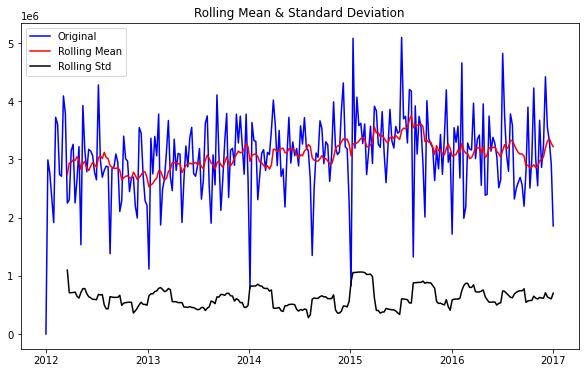

Results of Dickey-Fuller Test:
Test Statistic                -1.571275e+01
p-value                        1.353249e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.610000e+02
Critical Value (1%)           -3.455656e+00
Critical Value (5%)           -2.872678e+00
Critical Value (10%)          -2.572705e+00
dtype: float64


In [194]:
#Test Y Weekly
test_stationarity(y_w)

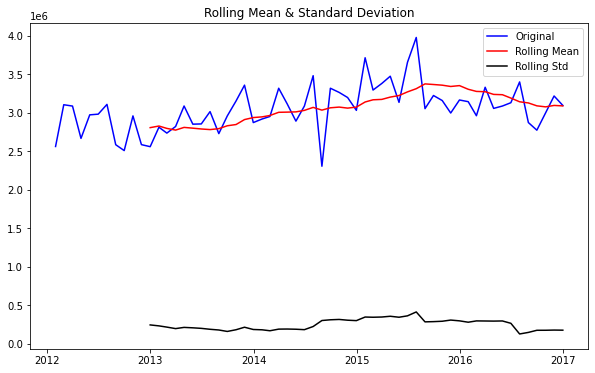

Results of Dickey-Fuller Test:
Test Statistic                 -1.690040
p-value                         0.436251
#Lags Used                      3.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


In [195]:
#Test Y Monthly
test_stationarity(y_m)

### Estimating & Eliminating Trend

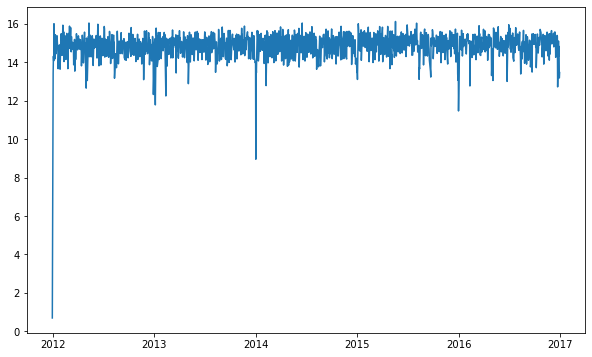

In [196]:
# One of the first tricks to reduce trend can be transformation.
ts_log = np.log(y_d)
plt.plot(ts_log)

### Decomposing

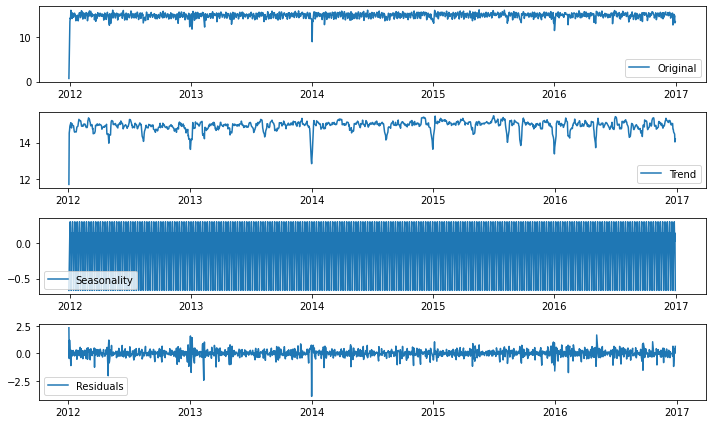

In [198]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

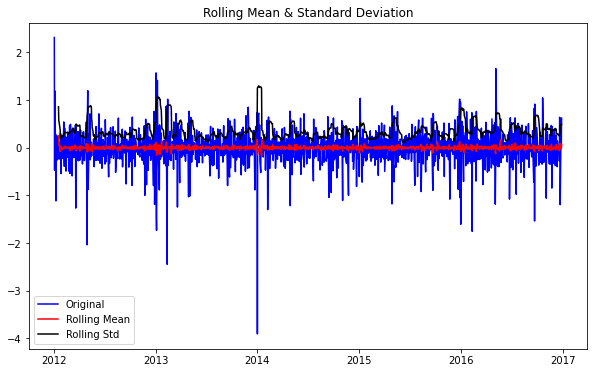

Results of Dickey-Fuller Test:
Test Statistic                -1.743437e+01
p-value                        4.747541e-30
#Lags Used                     2.000000e+01
Number of Observations Used    1.281000e+03
Critical Value (1%)           -3.435465e+00
Critical Value (5%)           -2.863799e+00
Critical Value (10%)          -2.567973e+00
dtype: float64


In [199]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### Forecasting a Time Series
We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

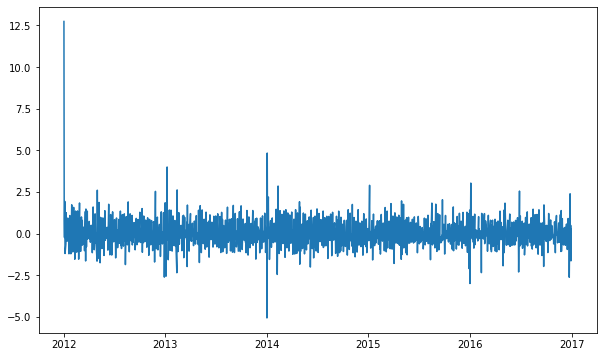

In [201]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

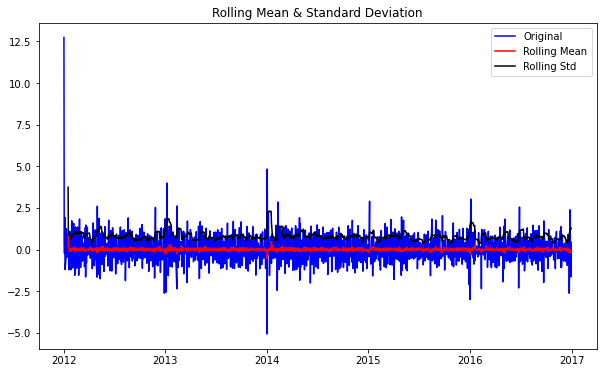

Results of Dickey-Fuller Test:
Test Statistic                -1.198453e+01
p-value                        3.639074e-22
#Lags Used                     2.300000e+01
Number of Observations Used    1.281000e+03
Critical Value (1%)           -3.435465e+00
Critical Value (5%)           -2.863799e+00
Critical Value (10%)          -2.567973e+00
dtype: float64


In [202]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Autocorrelation and Parcial Autocorrelation

In [204]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#sm.graphics.tsa.plot_acf(y_d.values.squeeze(), lags=40)
#plt.show()
#plot_acf(y_d, lags=30, alpha=0.05)
#plot_acf(y_d.diff().dropna(), lags=30, alpha=0.05)

# A non-stationary time series data will show significance between itself and its lagged values, and that significance will decay to zero slowly as in the plot.

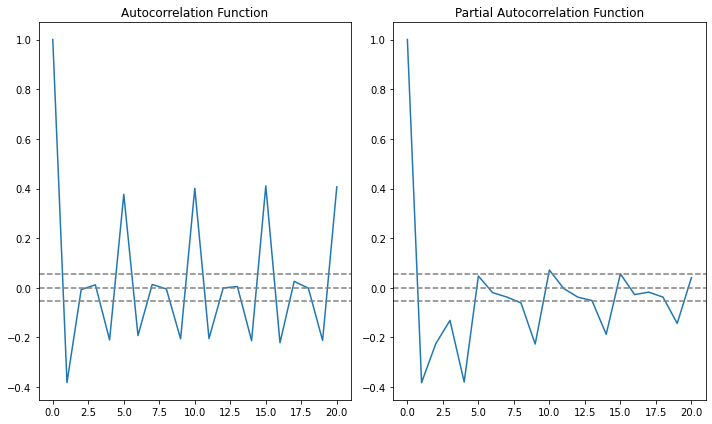

In [206]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

    p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=5.
    q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

## Steps for ARIMA implementation
The general steps to implement an ARIMA model are –

    1. Load the data: The first step for model building is of course to load the dataset
    2. Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.
    3. Make series stationary: In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations
    4. Determine d value: For making the series stationary, the number of times the difference operation was performed will be taken as the d value
    5. Create ACF and PACF plots: This is the most important step in ARIMA implementation. ACF PACF plots are used to determine the input parameters for our ARIMA model
    6. Determine the p and q values: Read the values of p and q from the plots in the previous step
    7. Fit ARIMA model: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model
    8. Predict values on validation set: Predict the future values
    9. Calculate RMSE: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set

# 4. Data pre-processing and feature engineering

In [ ]:
a